In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from MakeSTFTs import *
from Train import *
from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 930 STFTs from STFTs.pkl
Using 100 STFTs


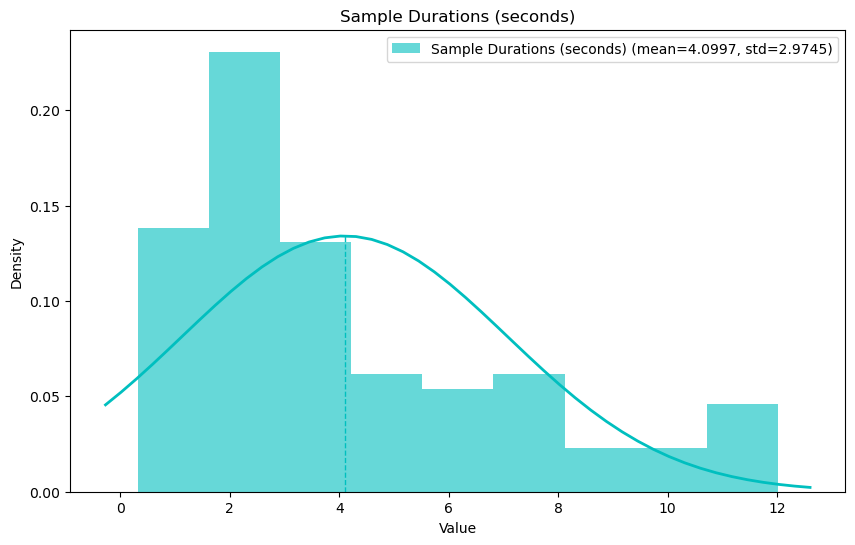

Input STFTs: torch.Size([100, 1024, 114]) x torch.float32
Using model=StepWiseMLP
Optimising hyper-parameters:


[Integer(low=16, high=512, prior='log-uniform', transform='identity'),
 Real(low=1e-06, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-08, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=10, high=50, prior='uniform', transform='identity'),
 Integer(low=2, high=4, prior='uniform', transform='identity'),
 Real(low=0.1, high=2.0, prior='log-uniform', transform='identity')]




Hyper-Parameter tuning#1

train_model: hyper-parameters=[59, 0.0012386606571219302, 7.75606765603405e-06, 31, 3, 0.13689036623219833]
opt_params=[59, 0.0012386606571219302, 7.75606765603405e-06], model_params=[31, 3, 0.13689036623219833]
optimiser: batch=59, learning_rate=0.001, weight_decay=8e-06
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 33.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=213, bias=True)
    (1): ReLU()
    (2): Linear(in_features=213, out_features=31, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1056, out_features=1026, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1026, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=2,579,414 parameters, exact=2,579,414, error=0.00%
model: StepWiseMLP: control=31, depth=3, ratio=0.14
train=80 samples, batch=59 --> 1.4 batches/epoch
total=4 sec, epoch=5 (0.9 sec/epoch), train=0.0397 (16.74%), test=0.0167 (19.36%), overfit=0.42
Aborting: model returns NaNs :(



Hyper-Parameter tuning#2

train_model: hyper-parameters=[332, 1.2386606571219315e-05, 0.00775606765603405, 11, 2, 0.6121923287200746]
opt_params=[332, 1.2386606571219315e-05, 0.00775606765603405], model_params=[11, 2, 0.6121923287200746]
optimiser: batch=332, learning_rate=1e-05, weight_decay=0.008
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 93.1 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=11, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1036, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,084,438 parameters, exact=1,084,438, error=0.00%
model: StepWiseMLP: control=11, depth=2, ratio=0.61
train=80 samples, batch=332 --> 0.2 batches/epoch
total=4 sec, epoch=12 (0.4 sec/epoch), train=0.1344 (-0.60%), test=0.0400 (-0.53%), overfit=0.30
total=9 sec, epoch=29 (0.3 sec/epoch), train=0.1248 (-0.33%), test=0.0374 (-0.29%), overfit=0.30
Training is stalled...


Finished Training after 31 epochs in 10.0 sec (0.32 sec/epoch), sample duration=2.0 sec, test loss=0.04, train loss=0.12, overfit=0.3


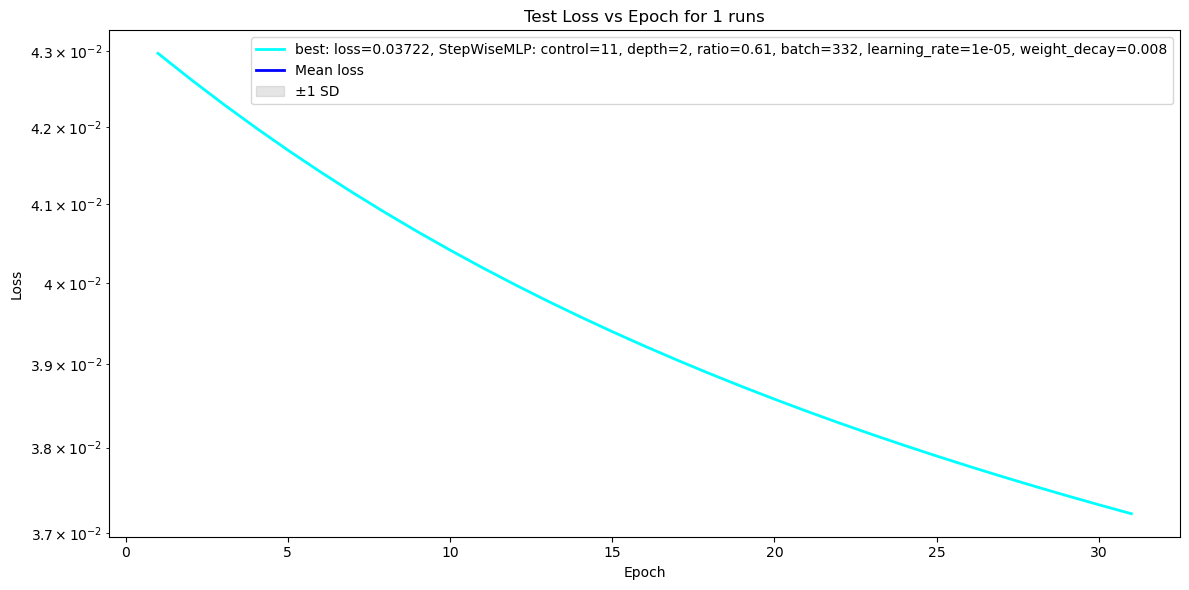




Hyper-Parameter tuning#3

train_model: hyper-parameters=[25, 1.2386606571219315e-06, 2.4526839479431004e-07, 41, 3, 0.2894878789915622]
opt_params=[25, 1.2386606571219315e-06, 2.4526839479431004e-07], model_params=[41, 3, 0.2894878789915622]
optimiser: batch=25, learning_rate=1e-06, weight_decay=2e-07
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 25.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=406, bias=True)
    (1): ReLU()
    (2): Linear(in_features=406, out_features=41, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1066, out_features=1031, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1031, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=3,005,832 parameters, exact=3,005,832, error=0.00%
model: StepWiseMLP: control=41, depth=3, ratio=0.29
train=80 samples, batch=25 --> 3.2 batches/epoch
total=5 sec, epoch=3 (1.5 sec/epoch), train=0.0382 (-0.21%), test=0.0320 (-0.21%), overfit=0.84
total=10 sec, epoch=7 (1.4 sec/epoch), train=0.0379 (-0.20%), test=0.0317 (-0.21%), overfit=0.84
total=15 sec, epoch=11 (1.4 sec/epoch), train=0.0376 (-0.19%), test=0.0315 (-0.20%), overfit=0.84
total=21 sec, epoch=15 (1.4 sec/epoch), train=0.0373 (-0.19%), test=0.0312 (-0.19%), overfit=0.84
total=26 sec, epoch=19 (1.4 sec/epoch), train=0.0370 (-0.18%), test=0.0310 (-0.19%), overfit=0.84
total=31 sec, epoch=23 (1.4 sec/epoch), train=0.0368 (-0.18%), test=0.0308 (-0.18%), overfit=0.84
total=37 sec, epoch=27 (1.4 sec/epoch), train=0.0365 (-0.18%), test=0.0306 (-0.18%), overfit=0.84
total=42 sec, epoch=31 (1.4 sec/epoch), train=0.0363 (-0.17%), test=0.0303 (-0.18%), overfit=0.84
total=48 sec, epoch=35 (1.4 sec/epoc

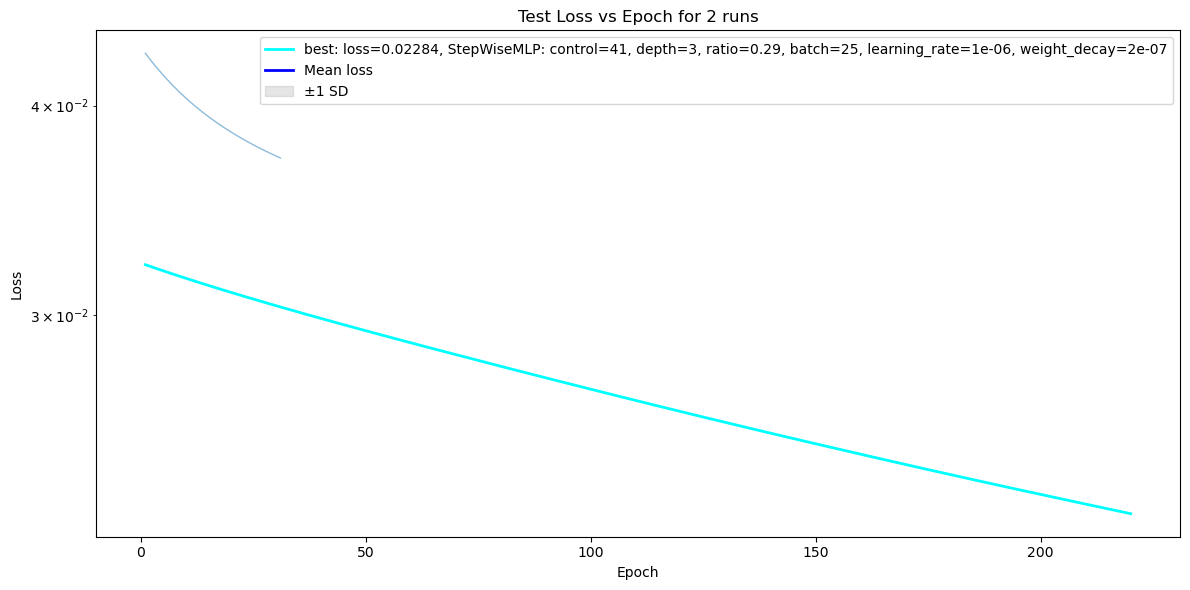




Hyper-Parameter tuning#4

train_model: hyper-parameters=[140, 0.00012386606571219316, 0.00024526839479431, 21, 4, 1.2946291521747328]
opt_params=[140, 0.00012386606571219316, 0.00024526839479431], model_params=[21, 4, 1.2946291521747328]
optimiser: batch=140, learning_rate=0.0001, weight_decay=0.0002
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 48.8 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1559, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1559, out_features=849, bias=True)
    (3): ReLU()
    (4): Linear(in_features=849, out_features=21, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1046, out_features=1040, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1040, out_features=1032, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1032, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=7,759,224 parameters, exact=7,759,224, error=0.00%
model: StepWiseMLP: control=21, depth=4, ratio=1.29
train=80 samples, batch=140 --> 0.6 batches/epoch
total=4 sec, epoch=5 (0.8 sec/epoch), train=0.1116 (-3.04%), test=0.0230 (-3.37%), overfit=0.21
total=9 sec, epoch=14 (0.6 sec/epoch), train=0.0893 (-1.91%), test=0.0182 (-1.86%), overfit=0.20
total=14 sec, epoch=23 (0.6 sec/epoch), train=0.0776 (-1.43%), test=0.0161 (-1.15%), overfit=0.21
Training is stalled...


Finished Training after 31 epochs in 19.1 sec (0.62 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.07, overfit=0.2


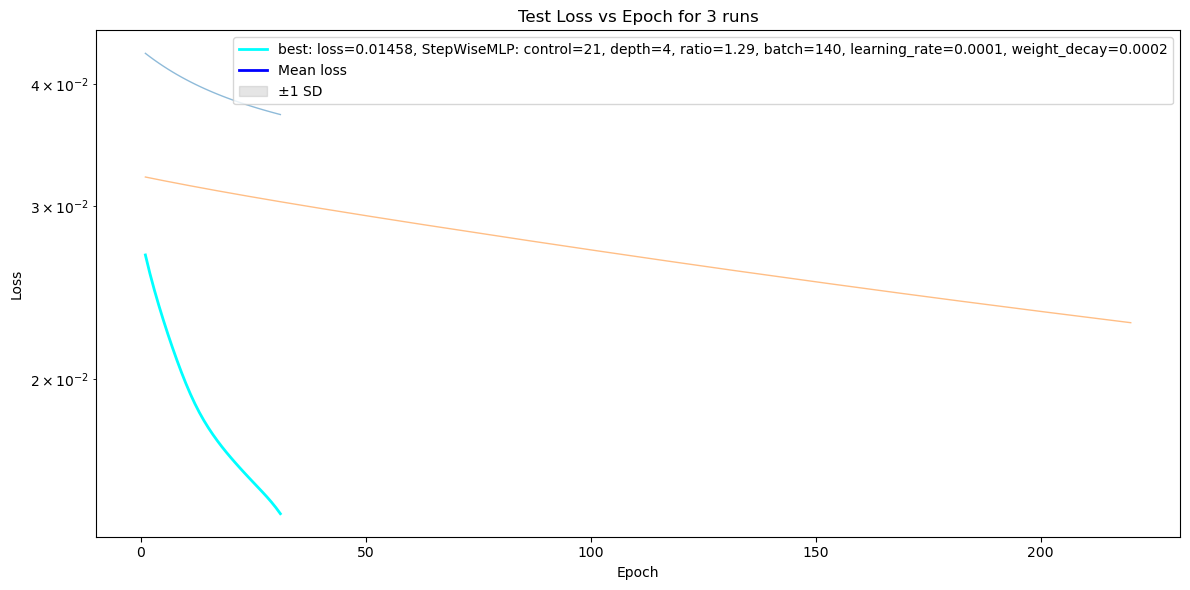




Hyper-Parameter tuning#5

train_model: hyper-parameters=[216, 3.9169889245461685e-06, 4.361557363960192e-08, 36, 3, 1.8826696936854304]
opt_params=[216, 3.9169889245461685e-06, 4.361557363960192e-08], model_params=[36, 3, 1.8826696936854304]
optimiser: batch=216, learning_rate=4e-06, weight_decay=4e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 28.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1503, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1503, out_features=36, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1061, out_features=1050, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1050, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=5,326,618 parameters, exact=5,326,618, error=0.00%
model: StepWiseMLP: control=36, depth=3, ratio=1.88
train=80 samples, batch=216 --> 0.4 batches/epoch
total=1 sec, epoch=1 (0.7 sec/epoch), train=0.1183 (0.00%), test=0.0401 (0.00%), overfit=0.34
total=6 sec, epoch=11 (0.5 sec/epoch), train=0.1160 (-0.19%), test=0.0395 (-0.15%), overfit=0.34
total=11 sec, epoch=22 (0.5 sec/epoch), train=0.1137 (-0.18%), test=0.0389 (-0.14%), overfit=0.34
Training is stalled...


Finished Training after 31 epochs in 15.3 sec (0.49 sec/epoch), sample duration=2.0 sec, test loss=0.04, train loss=0.11, overfit=0.3


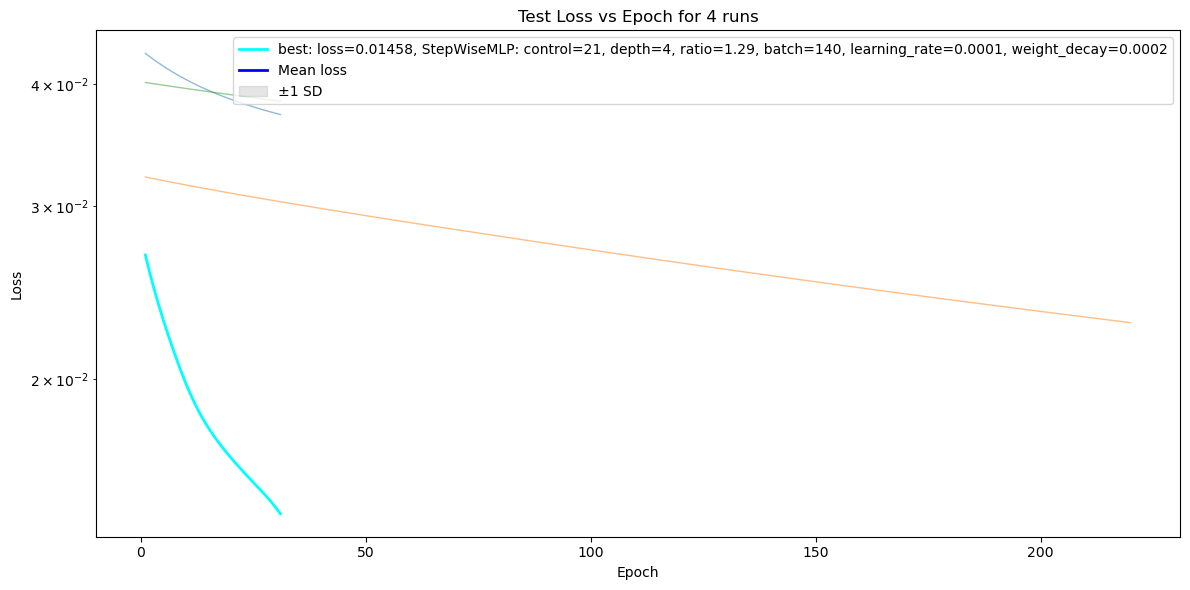




Hyper-Parameter tuning#6

train_model: hyper-parameters=[38, 0.0003916988924546169, 4.3615573639601926e-05, 16, 2, 0.42097774142593286]
opt_params=[38, 0.0003916988924546169, 4.3615573639601926e-05], model_params=[16, 2, 0.42097774142593286]
optimiser: batch=38, learning_rate=0.0004, weight_decay=4e-05
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 64.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1041, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,099,808 parameters, exact=1,099,808, error=0.00%
model: StepWiseMLP: control=16, depth=2, ratio=0.42
train=80 samples, batch=38 --> 2.1 batches/epoch
total=1 sec, epoch=1 (1.0 sec/epoch), train=0.0442 (0.00%), test=0.0359 (0.00%), overfit=0.81
total=6 sec, epoch=8 (0.8 sec/epoch), train=0.0259 (-6.38%), test=0.0216 (-6.71%), overfit=0.84
total=12 sec, epoch=15 (0.8 sec/epoch), train=0.0181 (-4.26%), test=0.0154 (-3.85%), overfit=0.85
*** Best! loss=0.0150, model=StepWiseMLP: control=16, depth=2, ratio=0.42, hyper=batch=38, learning_rate=0.0004, weight_decay=4e-05
total=17 sec, epoch=22 (0.8 sec/epoch), train=0.0150 (0.07%), test=0.0132 (0.67%), overfit=0.88
*** Best! loss=0.0141, model=StepWiseMLP: control=16, depth=2, ratio=0.42, hyper=batch=38, learning_rate=0.0004, weight_decay=4e-05
*** Best! loss=0.0133, model=StepWiseMLP: control=16, depth=2, ratio=0.42, hyper=batch=38, learning_rate=0.0004, weight_decay=4e-05
*** Best! loss=0.0126, model=StepWise

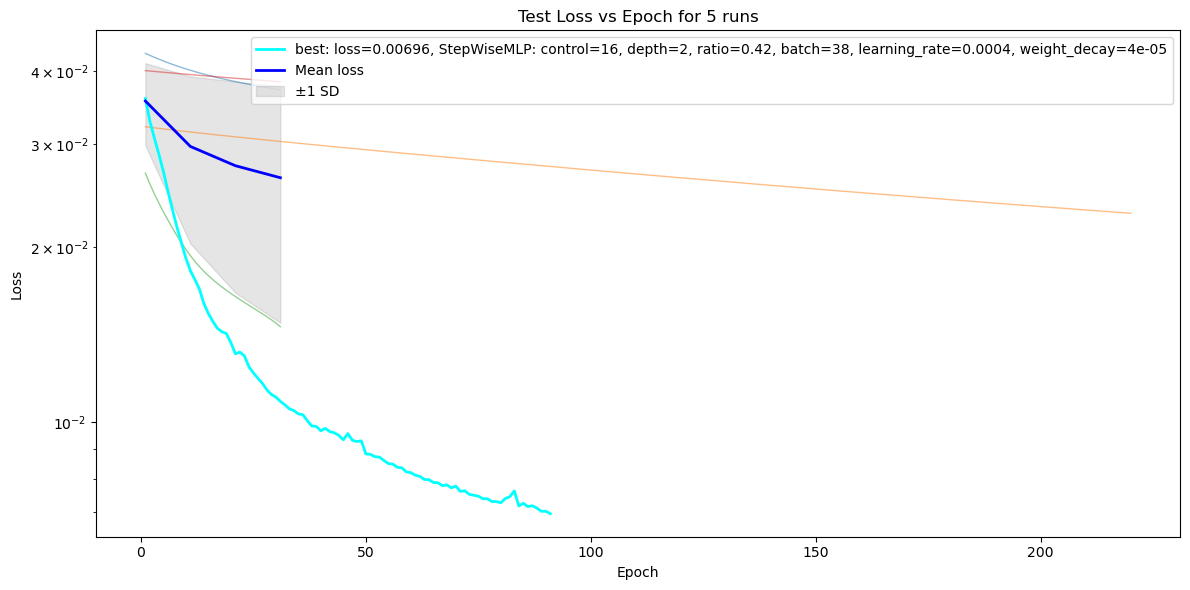




Hyper-Parameter tuning#7

train_model: hyper-parameters=[16, 0.003916988924546165, 0.0013792455415594202, 46, 4, 0.8902595326637875]
opt_params=[16, 0.003916988924546165, 0.0013792455415594202], model_params=[46, 4, 0.8902595326637875]
optimiser: batch=16, learning_rate=0.004, weight_decay=0.001
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 22.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1295, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1295, out_features=652, bias=True)
    (3): ReLU()
    (4): Linear(in_features=652, out_features=46, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1071, out_features=1053, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1053, out_features=1038, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1038, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=6,816,584 parameters, exact=6,816,584, error=0.00%
model: StepWiseMLP: control=46, depth=4, ratio=0.89
train=80 samples, batch=16 --> 5.0 batches/epoch
total=5 sec, epoch=2 (2.6 sec/epoch), train=0.0129 (-4.43%), test=0.0146 (-6.11%), overfit=1.13
total=10 sec, epoch=4 (2.6 sec/epoch), train=0.0125 (-0.48%), test=0.0148 (-0.57%), overfit=1.18
total=18 sec, epoch=7 (2.5 sec/epoch), train=0.0128 (1.44%), test=0.0149 (0.31%), overfit=1.16
total=25 sec, epoch=10 (2.5 sec/epoch), train=0.0125 (-0.05%), test=0.0146 (-0.62%), overfit=1.16
total=32 sec, epoch=13 (2.5 sec/epoch), train=0.0126 (-0.16%), test=0.0145 (-1.89%), overfit=1.15
total=40 sec, epoch=16 (2.5 sec/epoch), train=0.0126 (0.28%), test=0.0149 (2.00%), overfit=1.18
total=47 sec, epoch=19 (2.5 sec/epoch), train=0.0128 (0.91%), test=0.0151 (2.14%), overfit=1.18
total=54 sec, epoch=22 (2.5 sec/epoch), train=0.0127 (0.14%), test=0.0148 (0.04%), overfit=1.16
total=62 sec, epoch=25 (2.5 sec/epoch), train

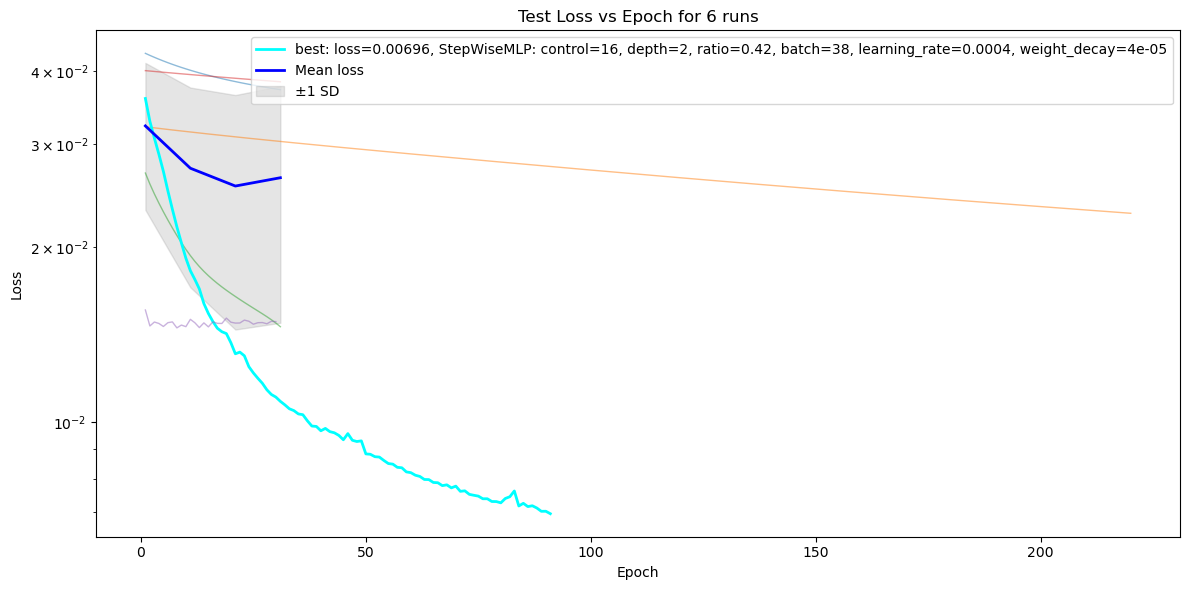




Hyper-Parameter tuning#8

train_model: hyper-parameters=[91, 3.916988924546169e-05, 1.3792455415594201e-06, 26, 3, 0.1990680832653423]
opt_params=[91, 3.916988924546169e-05, 1.3792455415594201e-06], model_params=[26, 3, 0.1990680832653423]
optimiser: batch=91, learning_rate=4e-05, weight_decay=1e-06
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 39.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=286, bias=True)
    (1): ReLU()
    (2): Linear(in_features=286, out_features=26, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1051, out_features=1027, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1027, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=2,726,838 parameters, exact=2,726,838, error=0.00%
model: StepWiseMLP: control=26, depth=3, ratio=0.20
train=80 samples, batch=91 --> 0.9 batches/epoch
total=1 sec, epoch=1 (0.7 sec/epoch), train=0.1342 (0.00%), test=0.0316 (0.00%), overfit=0.24
total=6 sec, epoch=12 (0.5 sec/epoch), train=0.1161 (-1.10%), test=0.0272 (-1.15%), overfit=0.23
total=11 sec, epoch=24 (0.5 sec/epoch), train=0.1034 (-0.87%), test=0.0240 (-0.92%), overfit=0.23
Training is stalled...


Finished Training after 31 epochs in 14.5 sec (0.47 sec/epoch), sample duration=2.0 sec, test loss=0.02, train loss=0.10, overfit=0.2


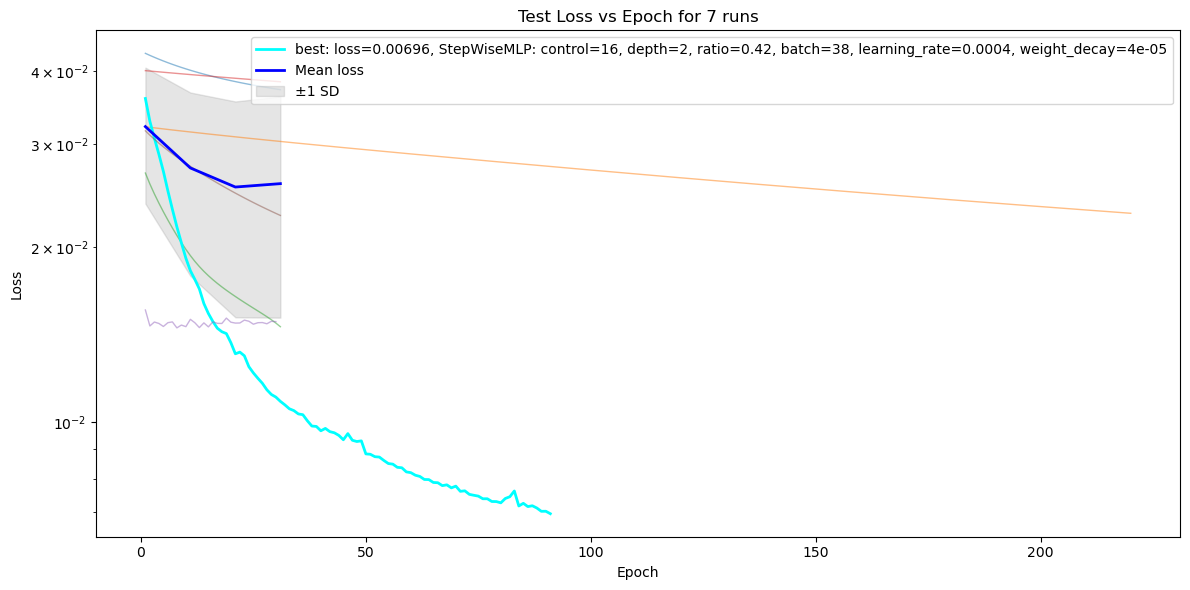




Hyper-Parameter tuning#9

train_model: hyper-parameters=[113, 2.202684742585213e-06, 0.0005816230222450688, 19, 2, 0.24005790384696699]
opt_params=[113, 2.202684742585213e-06, 0.0005816230222450688], model_params=[19, 2, 0.24005790384696699]
optimiser: batch=113, learning_rate=2e-06, weight_decay=0.0006
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 53.9 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=19, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1044, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,109,030 parameters, exact=1,109,030, error=0.00%
model: StepWiseMLP: control=19, depth=2, ratio=0.24
train=80 samples, batch=113 --> 0.7 batches/epoch
total=2 sec, epoch=5 (0.4 sec/epoch), train=0.1448 (-0.20%), test=0.0384 (-0.19%), overfit=0.27
total=7 sec, epoch=21 (0.3 sec/epoch), train=0.1405 (-0.18%), test=0.0373 (-0.17%), overfit=0.27
Training is stalled...


Finished Training after 31 epochs in 10.3 sec (0.33 sec/epoch), sample duration=2.0 sec, test loss=0.04, train loss=0.14, overfit=0.3


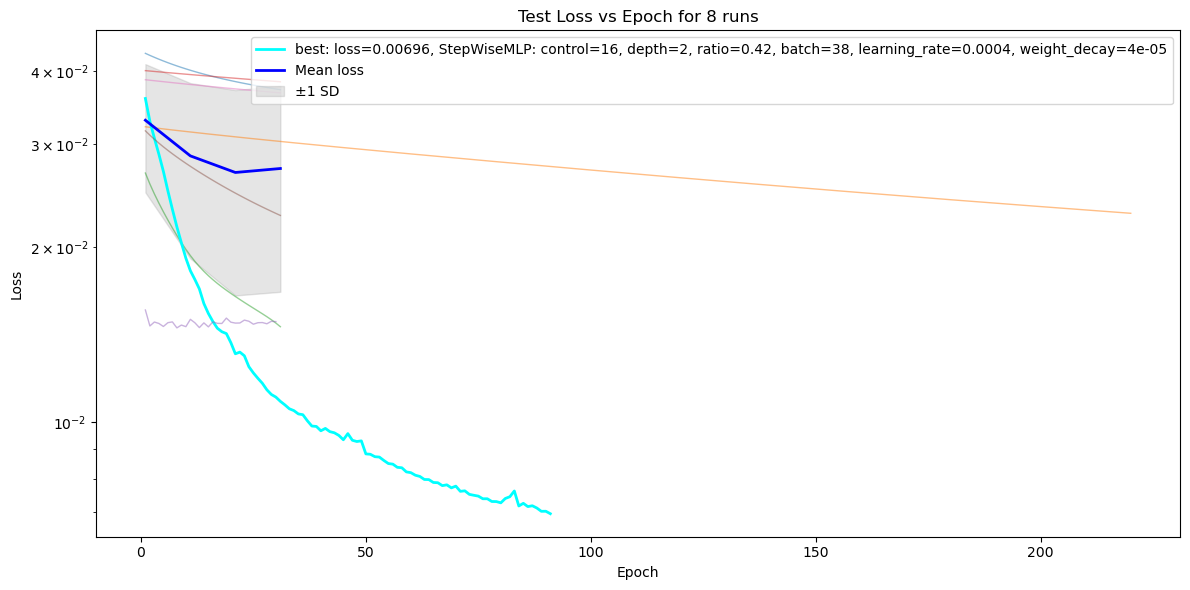




Hyper-Parameter tuning#10

train_model: hyper-parameters=[20, 0.0002202684742585213, 5.816230222450688e-07, 39, 3, 1.073571583075853]
opt_params=[20, 0.0002202684742585213, 5.816230222450688e-07], model_params=[39, 3, 1.073571583075853]
optimiser: batch=20, learning_rate=0.0002, weight_decay=6e-07
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 26.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1093, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1093, out_features=39, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1064, out_features=1044, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1044, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=4,465,256 parameters, exact=4,465,256, error=0.00%
model: StepWiseMLP: control=39, depth=3, ratio=1.07
train=80 samples, batch=20 --> 4.0 batches/epoch
total=3 sec, epoch=2 (1.5 sec/epoch), train=0.0213 (-14.21%), test=0.0245 (-13.36%), overfit=1.15
total=9 sec, epoch=6 (1.5 sec/epoch), train=0.0119 (-11.20%), test=0.0139 (-10.13%), overfit=1.16
total=15 sec, epoch=10 (1.5 sec/epoch), train=0.0090 (-7.69%), test=0.0105 (-6.46%), overfit=1.17
total=21 sec, epoch=14 (1.5 sec/epoch), train=0.0065 (-5.90%), test=0.0086 (-1.95%), overfit=1.32
total=26 sec, epoch=18 (1.4 sec/epoch), train=0.0054 (-4.59%), test=0.0076 (-4.13%), overfit=1.41
*** Best! loss=0.0047, model=StepWiseMLP: control=39, depth=3, ratio=1.07, hyper=batch=20, learning_rate=0.0002, weight_decay=6e-07
total=32 sec, epoch=22 (1.4 sec/epoch), train=0.0044 (-4.40%), test=0.0066 (-2.92%), overfit=1.48
*** Best! loss=0.0043, model=StepWiseMLP: control=39, depth=3, ratio=1.07, hyper=batch=20, learni

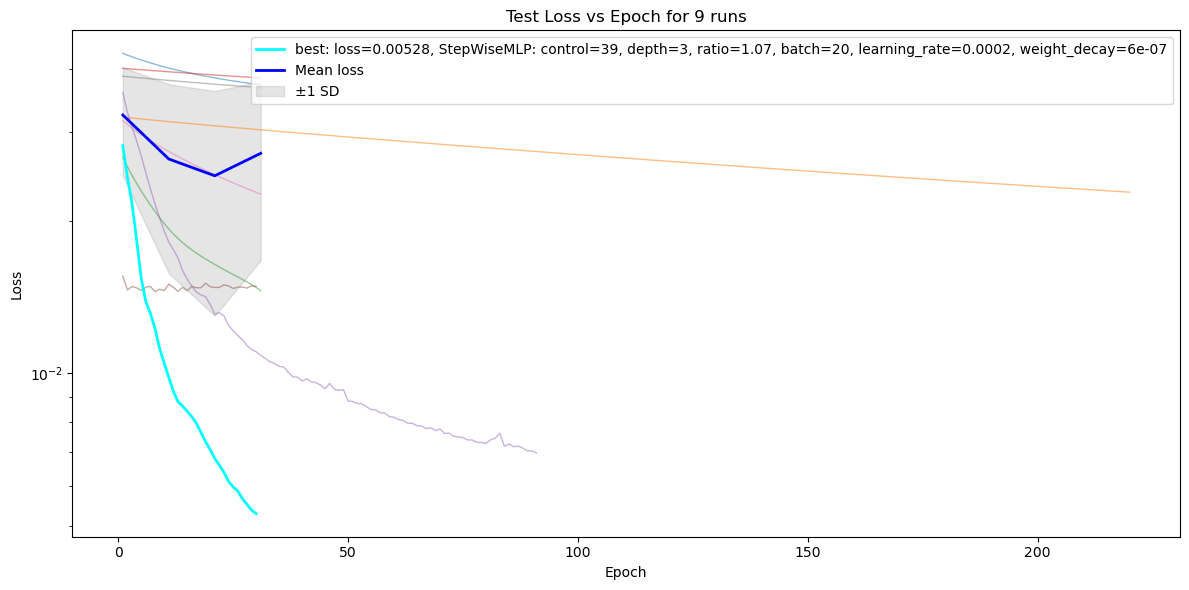




Hyper-Parameter tuning#11

train_model: hyper-parameters=[47, 0.0022026847425852107, 1.8392534898851976e-08, 29, 4, 0.5076606581791219]
opt_params=[47, 0.0022026847425852107, 1.8392534898851976e-08], model_params=[29, 4, 0.5076606581791219]
optimiser: batch=47, learning_rate=0.002, weight_decay=2e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 35.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=892, bias=True)
    (1): ReLU()
    (2): Linear(in_features=892, out_features=404, bias=True)
    (3): ReLU()
    (4): Linear(in_features=404, out_features=29, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1054, out_features=1036, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1036, out_features=1029, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1029, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=5,415,890 parameters, exact=5,415,890, error=0.00%
model: StepWiseMLP: control=29, depth=4, ratio=0.51
train=80 samples, batch=47 --> 1.7 batches/epoch
Aborting: model returns NaNs :(



Hyper-Parameter tuning#12

train_model: hyper-parameters=[268, 2.202684742585213e-05, 1.8392534898851974e-05, 49, 3, 0.11351637411908017]
opt_params=[268, 2.202684742585213e-05, 1.8392534898851974e-05], model_params=[49, 3, 0.11351637411908017]
optimiser: batch=268, learning_rate=2e-05, weight_decay=2e-05
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 20.9 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=49, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1074, out_features=1027, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1027, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=2,576,546 parameters, exact=2,576,546, error=0.00%
model: StepWiseMLP: control=49, depth=3, ratio=0.11
train=80 samples, batch=268 --> 0.3 batches/epoch
total=3 sec, epoch=5 (0.6 sec/epoch), train=0.1208 (-0.93%), test=0.0363 (-0.83%), overfit=0.30
total=8 sec, epoch=17 (0.5 sec/epoch), train=0.1097 (-0.71%), test=0.0333 (-0.64%), overfit=0.30
total=13 sec, epoch=29 (0.5 sec/epoch), train=0.1014 (-0.62%), test=0.0310 (-0.56%), overfit=0.31
Training is stalled...


Finished Training after 31 epochs in 14.3 sec (0.46 sec/epoch), sample duration=2.0 sec, test loss=0.03, train loss=0.10, overfit=0.3


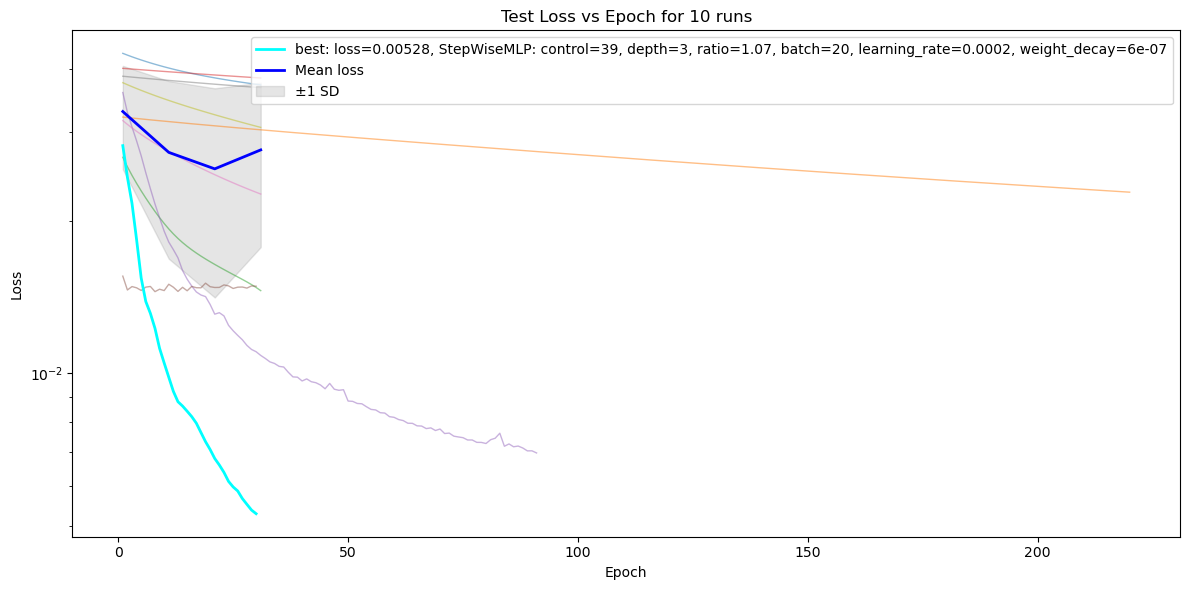




Hyper-Parameter tuning#13

train_model: hyper-parameters=[174, 0.006965500753870949, 3.2707066109050788e-06, 14, 2, 1.561204365021131]
opt_params=[174, 0.006965500753870949, 3.2707066109050788e-06], model_params=[14, 2, 1.561204365021131]
optimiser: batch=174, learning_rate=0.007, weight_decay=3e-06
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 73.1 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=14, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1039, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,093,660 parameters, exact=1,093,660, error=0.00%
model: StepWiseMLP: control=14, depth=2, ratio=1.56
train=80 samples, batch=174 --> 0.5 batches/epoch
Aborting: model returns NaNs :(



Hyper-Parameter tuning#14

train_model: hyper-parameters=[31, 6.965500753870956e-05, 0.0032707066109050787, 34, 3, 0.3490959086956643]
opt_params=[31, 6.965500753870956e-05, 0.0032707066109050787], model_params=[34, 3, 0.3490959086956643]
optimiser: batch=31, learning_rate=7e-05, weight_decay=0.003
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 30.1 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=467, bias=True)
    (1): ReLU()
    (2): Linear(in_features=467, out_features=34, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1059, out_features=1031, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1031, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=3,122,890 parameters, exact=3,122,890, error=0.00%
model: StepWiseMLP: control=34, depth=3, ratio=0.35
train=80 samples, batch=31 --> 2.6 batches/epoch
total=4 sec, epoch=3 (1.2 sec/epoch), train=0.0433 (-2.64%), test=0.0282 (-2.78%), overfit=0.65
total=9 sec, epoch=8 (1.1 sec/epoch), train=0.0392 (-1.76%), test=0.0254 (-1.84%), overfit=0.65
total=14 sec, epoch=13 (1.1 sec/epoch), train=0.0361 (-1.54%), test=0.0233 (-1.57%), overfit=0.65
total=20 sec, epoch=18 (1.1 sec/epoch), train=0.0336 (-1.41%), test=0.0217 (-1.41%), overfit=0.65
total=25 sec, epoch=23 (1.1 sec/epoch), train=0.0313 (-1.33%), test=0.0202 (-1.29%), overfit=0.65
total=30 sec, epoch=28 (1.1 sec/epoch), train=0.0293 (-1.32%), test=0.0190 (-1.21%), overfit=0.65
total=35 sec, epoch=33 (1.1 sec/epoch), train=0.0275 (-1.23%), test=0.0180 (-1.06%), overfit=0.65
total=41 sec, epoch=38 (1.1 sec/epoch), train=0.0259 (-1.17%), test=0.0171 (-0.94%), overfit=0.66
total=46 sec, epoch=43 (1.1 sec/epoch

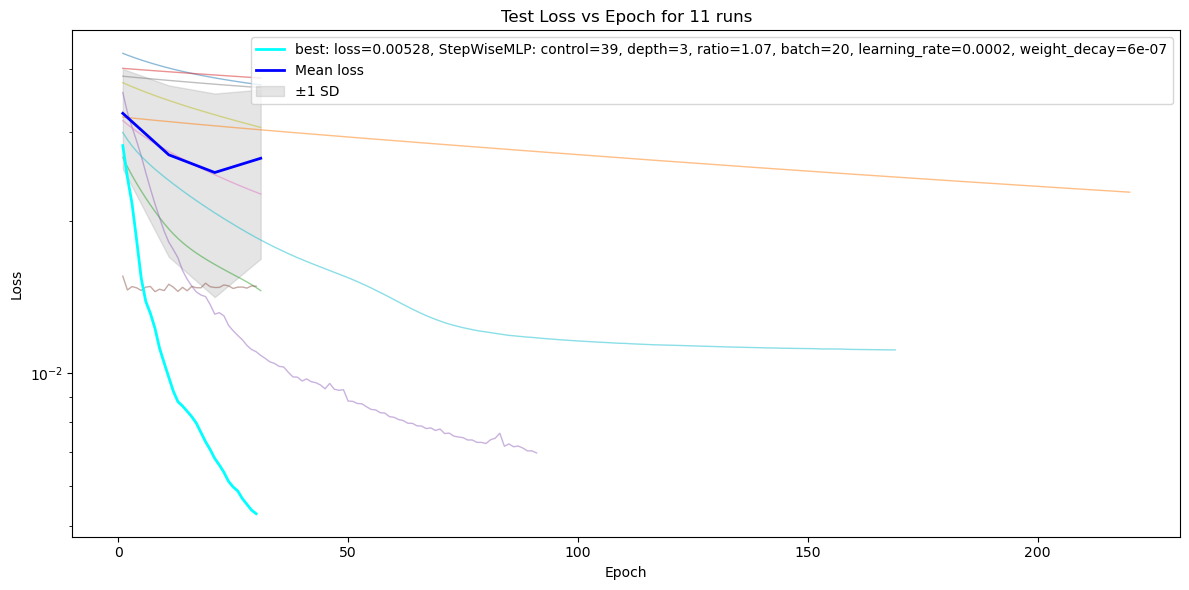




Hyper-Parameter tuning#15

train_model: hyper-parameters=[413, 6.965500753870956e-06, 0.00010342882448630162, 24, 3, 0.7382479640789329]
opt_params=[413, 6.965500753870956e-06, 0.00010342882448630162], model_params=[24, 3, 0.7382479640789329]
optimiser: batch=413, learning_rate=7e-06, weight_decay=0.0001
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 42.7 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=835, bias=True)
    (1): ReLU()
    (2): Linear(in_features=835, out_features=24, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1049, out_features=1034, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1034, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=3,877,354 parameters, exact=3,877,354, error=0.00%
model: StepWiseMLP: control=24, depth=3, ratio=0.74
train=80 samples, batch=413 --> 0.2 batches/epoch
total=4 sec, epoch=7 (0.6 sec/epoch), train=0.1261 (-0.30%), test=0.0399 (-0.24%), overfit=0.32
total=9 sec, epoch=19 (0.5 sec/epoch), train=0.1219 (-0.26%), test=0.0388 (-0.21%), overfit=0.32
total=15 sec, epoch=31 (0.5 sec/epoch), train=0.1184 (-0.23%), test=0.0379 (-0.19%), overfit=0.32
Training is stalled...


Finished Training after 31 epochs in 14.8 sec (0.48 sec/epoch), sample duration=2.0 sec, test loss=0.04, train loss=0.12, overfit=0.3


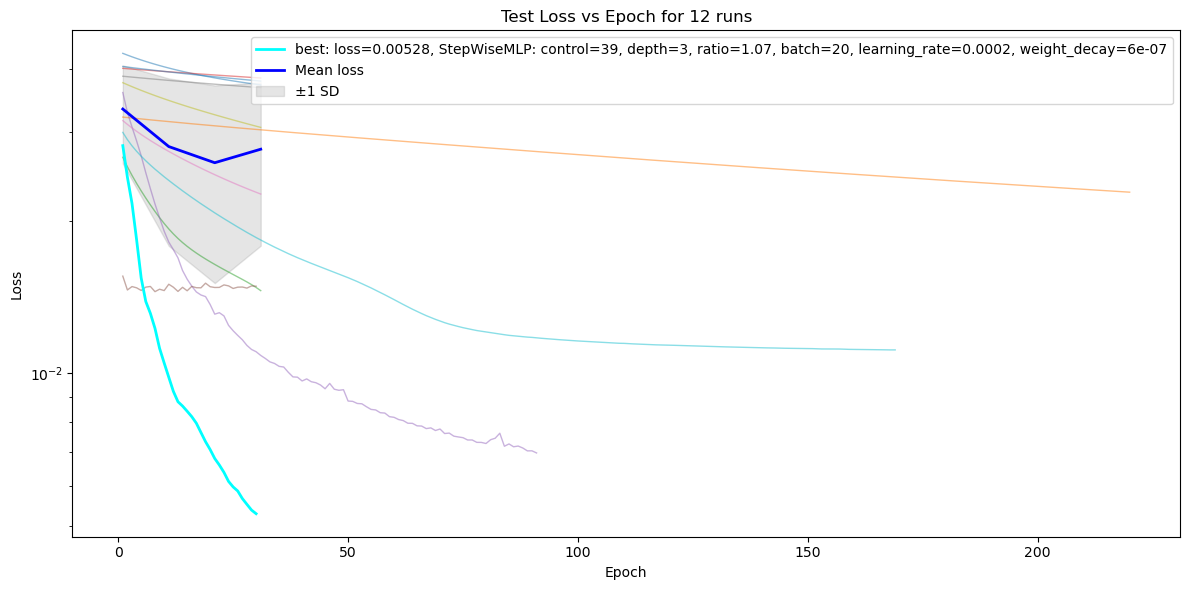




Hyper-Parameter tuning#16

train_model: hyper-parameters=[73, 0.0006965500753870955, 1.0342882448630163e-07, 44, 4, 0.16507726319313168]
opt_params=[73, 0.0006965500753870955, 1.0342882448630163e-07], model_params=[44, 4, 0.16507726319313168]
optimiser: batch=73, learning_rate=0.0007, weight_decay=1e-07
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 23.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=376, bias=True)
    (1): ReLU()
    (2): Linear(in_features=376, out_features=173, bias=True)
    (3): ReLU()
    (4): Linear(in_features=173, out_features=44, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1069, out_features=1031, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1031, out_features=1026, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1026, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=4,057,327 parameters, exact=4,057,327, error=0.00%
model: StepWiseMLP: control=44, depth=4, ratio=0.17
train=80 samples, batch=73 --> 1.1 batches/epoch
total=6 sec, epoch=5 (1.2 sec/epoch), train=0.0593 (-9.23%), test=0.0144 (-3.00%), overfit=0.24
total=12 sec, epoch=11 (1.1 sec/epoch), train=0.0605 (14.69%), test=0.0138 (9.15%), overfit=0.23
total=17 sec, epoch=17 (1.0 sec/epoch), train=0.0413 (-4.91%), test=0.0103 (-3.21%), overfit=0.25
total=23 sec, epoch=23 (1.0 sec/epoch), train=0.0378 (-0.86%), test=0.0093 (-1.82%), overfit=0.25
total=29 sec, epoch=29 (1.0 sec/epoch), train=0.0362 (-0.87%), test=0.0087 (-0.98%), overfit=0.24
Training is stalled...


Finished Training after 31 epochs in 30.8 sec (0.99 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.04, overfit=0.2


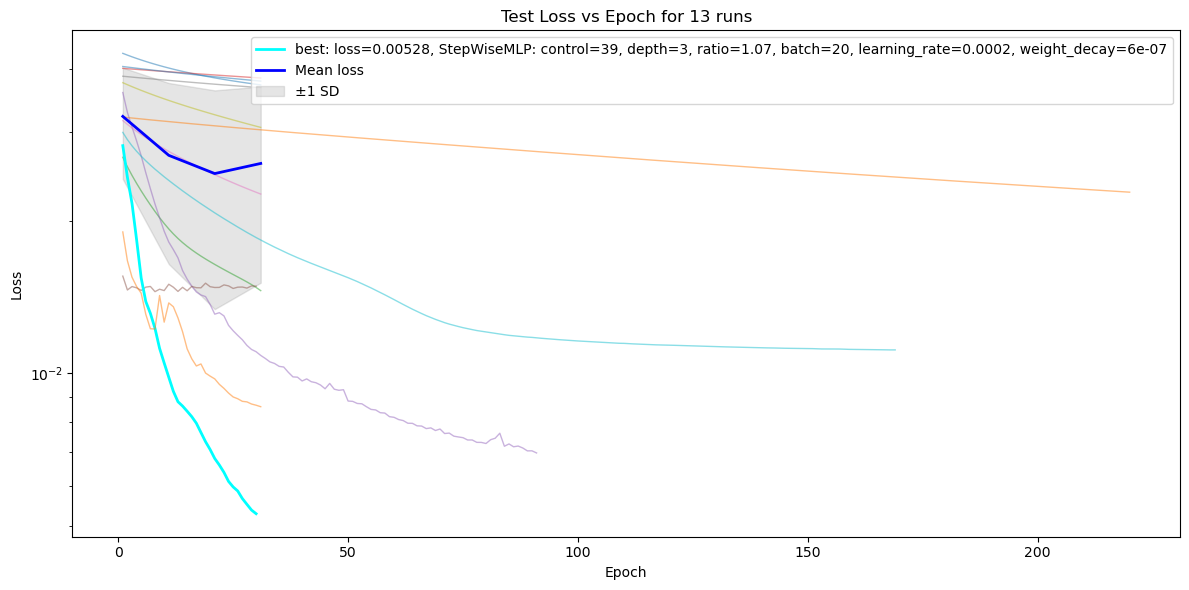




Hyper-Parameter tuning#17

train_model: hyper-parameters=[16, 0.00011631137169101936, 1e-08, 10, 2, 2.0]
opt_params=[16, 0.00011631137169101936, 1e-08], model_params=[10, 2, 2.0]
optimiser: batch=16, learning_rate=0.0001, weight_decay=1e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 102.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1035, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,081,364 parameters, exact=1,081,364, error=0.00%
model: StepWiseMLP: control=10, depth=2, ratio=2.00
train=80 samples, batch=16 --> 5.0 batches/epoch
total=3 sec, epoch=2 (1.4 sec/epoch), train=0.0207 (-9.90%), test=0.0186 (-9.44%), overfit=0.90
total=8 sec, epoch=6 (1.4 sec/epoch), train=0.0168 (-4.51%), test=0.0151 (-4.68%), overfit=0.90
total=14 sec, epoch=11 (1.3 sec/epoch), train=0.0137 (-2.99%), test=0.0122 (-3.58%), overfit=0.89
total=20 sec, epoch=16 (1.3 sec/epoch), train=0.0118 (-3.17%), test=0.0105 (-2.66%), overfit=0.89
total=26 sec, epoch=21 (1.3 sec/epoch), train=0.0103 (-2.45%), test=0.0092 (-2.18%), overfit=0.89
total=33 sec, epoch=26 (1.3 sec/epoch), train=0.0092 (-2.00%), test=0.0083 (-1.15%), overfit=0.90
total=38 sec, epoch=30 (1.3 sec/epoch), train=0.0085 (-1.88%), test=0.0077 (-2.01%), overfit=0.90
total=44 sec, epoch=35 (1.3 sec/epoch), train=0.0078 (-1.90%), test=0.0071 (-1.65%), overfit=0.91
total=50 sec, epoch=40 (1.2 sec/epoch

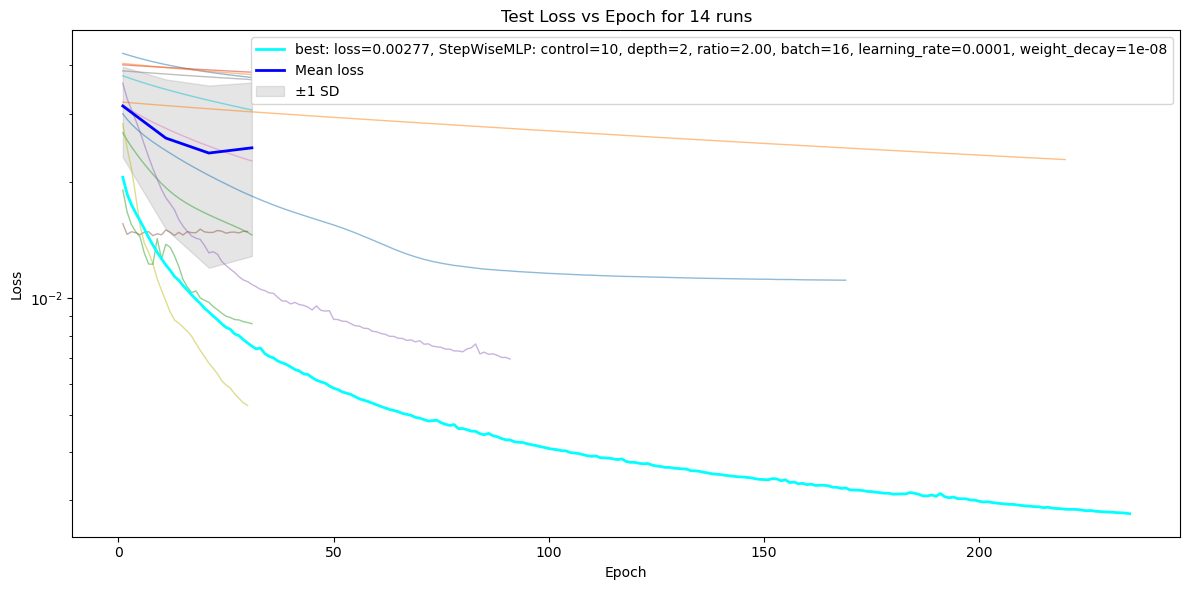




Hyper-Parameter tuning#18

train_model: hyper-parameters=[16, 8.555515458802381e-05, 1e-08, 43, 3, 2.0]
opt_params=[16, 8.555515458802381e-05, 1e-08], model_params=[43, 3, 2.0]
optimiser: batch=16, learning_rate=9e-05, weight_decay=1e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 23.8 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1547, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1547, out_features=43, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1068, out_features=1057, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1057, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=5,451,239 parameters, exact=5,451,239, error=0.00%
model: StepWiseMLP: control=43, depth=3, ratio=2.00
train=80 samples, batch=16 --> 5.0 batches/epoch
total=2 sec, epoch=1 (2.3 sec/epoch), train=0.0227 (0.00%), test=0.0181 (0.00%), overfit=0.80
total=8 sec, epoch=4 (2.1 sec/epoch), train=0.0172 (-7.71%), test=0.0135 (-8.11%), overfit=0.78
total=14 sec, epoch=7 (2.0 sec/epoch), train=0.0125 (-12.21%), test=0.0099 (-11.38%), overfit=0.79
total=20 sec, epoch=10 (2.0 sec/epoch), train=0.0094 (-5.46%), test=0.0077 (-5.32%), overfit=0.82
total=25 sec, epoch=13 (1.9 sec/epoch), train=0.0084 (-3.82%), test=0.0068 (-4.49%), overfit=0.81
total=31 sec, epoch=16 (1.9 sec/epoch), train=0.0074 (-4.14%), test=0.0060 (-3.86%), overfit=0.81
total=36 sec, epoch=19 (1.9 sec/epoch), train=0.0064 (-4.62%), test=0.0051 (-5.40%), overfit=0.80
total=42 sec, epoch=22 (1.9 sec/epoch), train=0.0057 (-3.60%), test=0.0045 (-3.84%), overfit=0.79
total=48 sec, epoch=25 (1.9 sec/epoch)

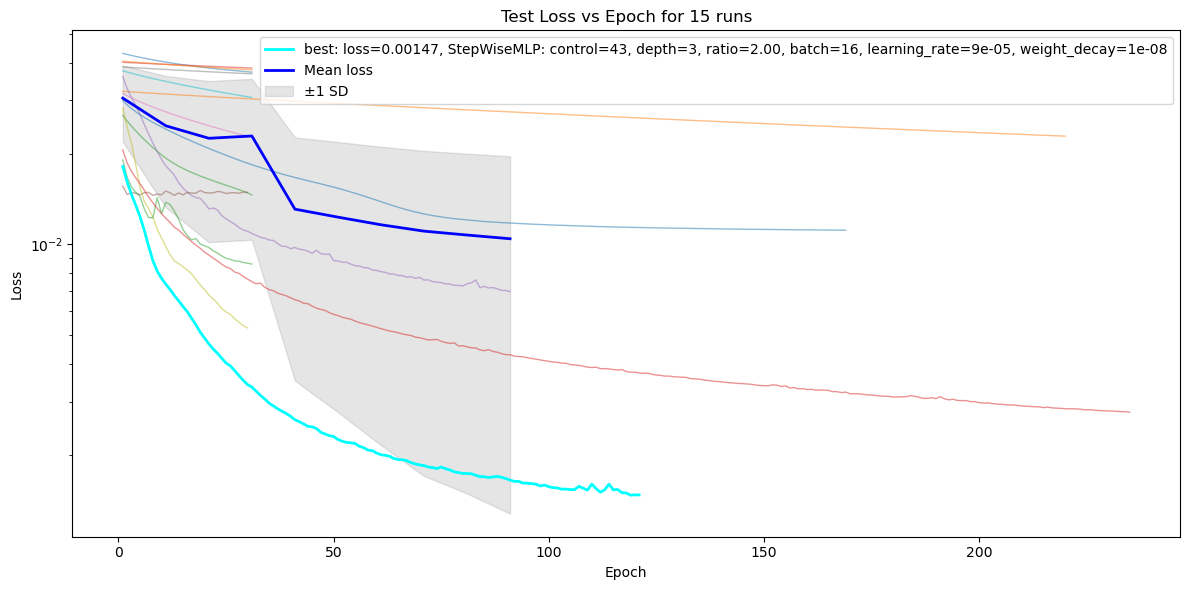




Hyper-Parameter tuning#19

train_model: hyper-parameters=[16, 0.001229952652327276, 0.01, 50, 4, 2.0]
opt_params=[16, 0.001229952652327276, 0.01], model_params=[50, 4, 2.0]
optimiser: batch=16, learning_rate=0.001, weight_decay=0.01
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 20.5 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1826, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1826, out_features=1160, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1160, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1075, out_features=1069, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1069, out_features=1052, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1052, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=9,274,826 parameters, exact=9,274,826, error=0.00%
model: StepWiseMLP: control=50, depth=4, ratio=2.00
train=80 samples, batch=16 --> 5.0 batches/epoch
total=6 sec, epoch=2 (2.8 sec/epoch), train=0.0168 (-12.92%), test=0.0165 (-11.77%), overfit=0.98
total=11 sec, epoch=4 (2.7 sec/epoch), train=0.0144 (-5.37%), test=0.0143 (-5.09%), overfit=0.99
total=19 sec, epoch=7 (2.6 sec/epoch), train=0.0139 (-0.72%), test=0.0138 (-0.76%), overfit=0.99
total=24 sec, epoch=9 (2.6 sec/epoch), train=0.0140 (0.34%), test=0.0139 (0.17%), overfit=0.99
total=31 sec, epoch=12 (2.6 sec/epoch), train=0.0142 (0.45%), test=0.0140 (0.37%), overfit=0.99
total=38 sec, epoch=15 (2.5 sec/epoch), train=0.0142 (0.07%), test=0.0140 (0.12%), overfit=0.99
total=45 sec, epoch=18 (2.5 sec/epoch), train=0.0141 (-0.19%), test=0.0139 (-0.12%), overfit=0.99
total=53 sec, epoch=21 (2.5 sec/epoch), train=0.0141 (0.28%), test=0.0139 (0.34%), overfit=0.99
total=58 sec, epoch=23 (2.5 sec/epoch), trai

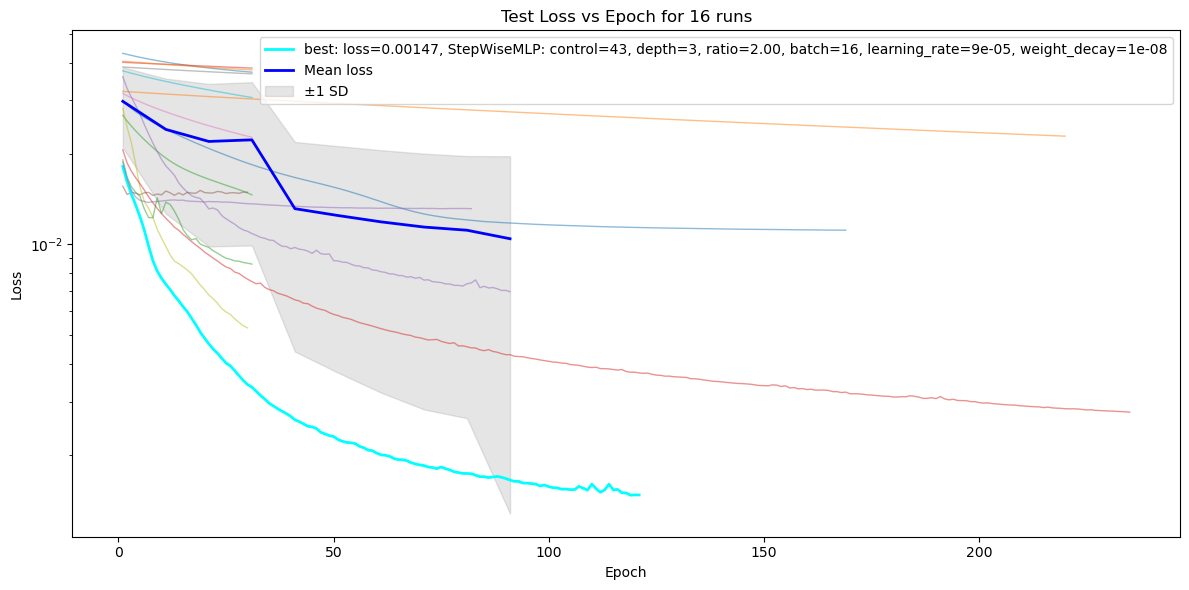




Hyper-Parameter tuning#20

train_model: hyper-parameters=[237, 2.497850539396993e-05, 4.0753806180276166e-08, 26, 4, 0.5803926193318867]
opt_params=[237, 2.497850539396993e-05, 4.0753806180276166e-08], model_params=[26, 4, 0.5803926193318867]
optimiser: batch=237, learning_rate=2e-05, weight_decay=4e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 39.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=979, bias=True)
    (1): ReLU()
    (2): Linear(in_features=979, out_features=450, bias=True)
    (3): ReLU()
    (4): Linear(in_features=450, out_features=26, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1051, out_features=1036, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1036, out_features=1029, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1029, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=5,671,341 parameters, exact=5,671,341, error=0.00%
model: StepWiseMLP: control=26, depth=4, ratio=0.58
train=80 samples, batch=237 --> 0.3 batches/epoch
total=2 sec, epoch=3 (0.8 sec/epoch), train=0.1219 (-0.90%), test=0.0337 (-0.84%), overfit=0.28
total=8 sec, epoch=12 (0.7 sec/epoch), train=0.1133 (-0.75%), test=0.0315 (-0.71%), overfit=0.28
total=13 sec, epoch=21 (0.6 sec/epoch), train=0.1062 (-0.71%), test=0.0296 (-0.67%), overfit=0.28
total=19 sec, epoch=30 (0.6 sec/epoch), train=0.0996 (-0.70%), test=0.0278 (-0.67%), overfit=0.28
Training is stalled...


Finished Training after 31 epochs in 19.3 sec (0.62 sec/epoch), sample duration=2.0 sec, test loss=0.03, train loss=0.10, overfit=0.3


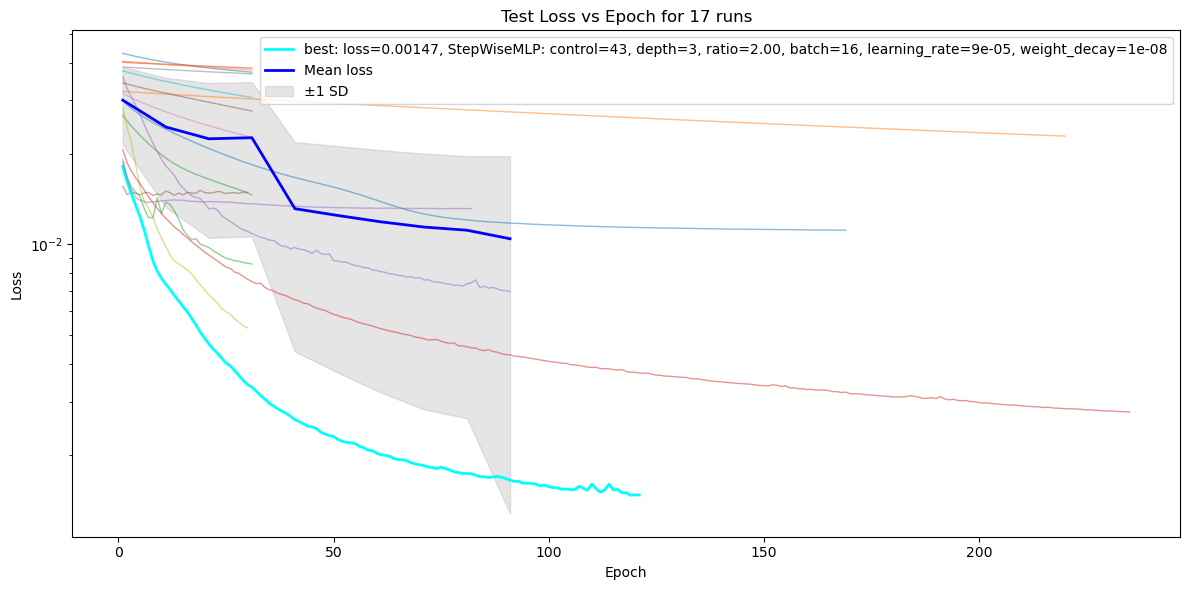




Hyper-Parameter tuning#21

train_model: hyper-parameters=[128, 4.009633240177845e-06, 3.271452034168545e-06, 41, 4, 1.3794083000269568]
opt_params=[128, 4.009633240177845e-06, 3.271452034168545e-06], model_params=[41, 4, 1.3794083000269568]
optimiser: batch=128, learning_rate=4e-06, weight_decay=3e-06
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 25.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1607, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1607, out_features=901, bias=True)
    (3): ReLU()
    (4): Linear(in_features=901, out_features=41, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1066, out_features=1056, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1056, out_features=1041, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1041, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=8,074,237 parameters, exact=8,074,237, error=0.00%
model: StepWiseMLP: control=41, depth=4, ratio=1.38
train=80 samples, batch=128 --> 0.6 batches/epoch
total=4 sec, epoch=5 (0.9 sec/epoch), train=0.1357 (-0.16%), test=0.0261 (-0.19%), overfit=0.19
total=10 sec, epoch=14 (0.7 sec/epoch), train=0.1338 (-0.15%), test=0.0256 (-0.18%), overfit=0.19
total=15 sec, epoch=22 (0.7 sec/epoch), train=0.1323 (-0.14%), test=0.0253 (-0.17%), overfit=0.19
total=20 sec, epoch=31 (0.7 sec/epoch), train=0.1306 (-0.14%), test=0.0249 (-0.16%), overfit=0.19
Training is stalled...


Finished Training after 31 epochs in 20.4 sec (0.66 sec/epoch), sample duration=2.0 sec, test loss=0.02, train loss=0.13, overfit=0.2


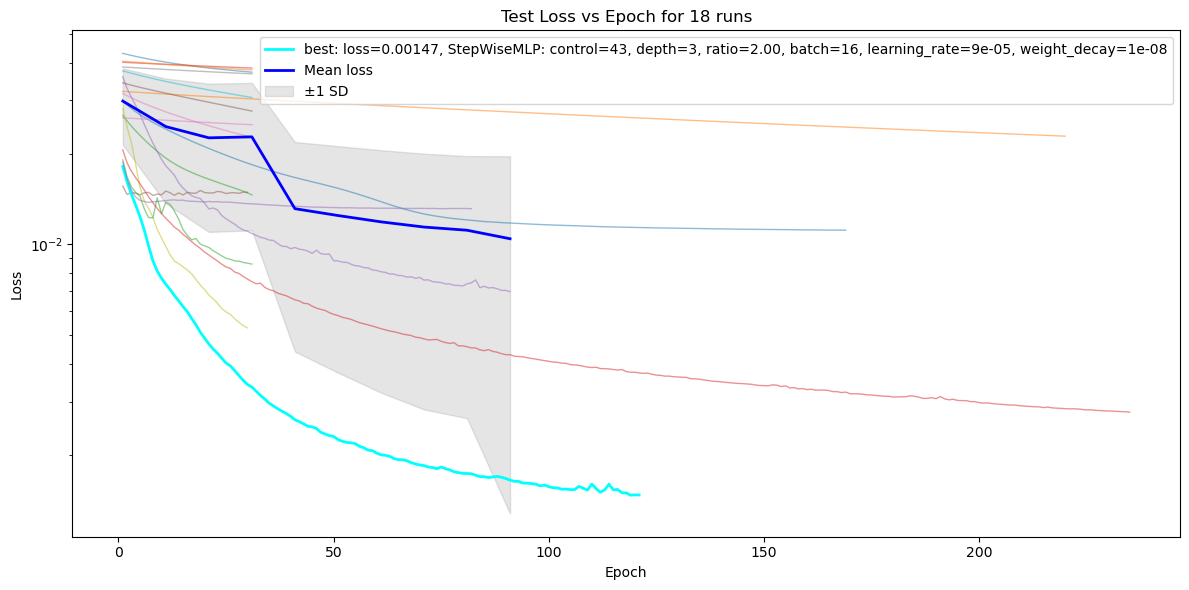




Hyper-Parameter tuning#22

train_model: hyper-parameters=[27, 0.001318698353067074, 0.00012101636213032367, 17, 2, 0.1079604144845209]
opt_params=[27, 0.001318698353067074, 0.00012101636213032367], model_params=[17, 2, 0.1079604144845209]
optimiser: batch=27, learning_rate=0.001, weight_decay=0.0001
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 60.2 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=17, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1042, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,102,882 parameters, exact=1,102,882, error=0.00%
model: StepWiseMLP: control=17, depth=2, ratio=0.11
train=80 samples, batch=27 --> 3.0 batches/epoch
total=5 sec, epoch=6 (0.9 sec/epoch), train=0.0312 (-100.00%), test=0.0222 (-100.00%), overfit=0.71
total=11 sec, epoch=13 (0.8 sec/epoch), train=17302415.6250 (-92.36%), test=14223518.0000 (-92.33%), overfit=0.82
total=16 sec, epoch=20 (0.8 sec/epoch), train=167033.3266 (17.62%), test=120660.7578 (16.99%), overfit=0.72
total=21 sec, epoch=27 (0.8 sec/epoch), train=274901.1656 (2.66%), test=198082.3438 (2.67%), overfit=0.72
total=26 sec, epoch=34 (0.8 sec/epoch), train=293815.2043 (0.33%), test=211760.5469 (0.33%), overfit=0.72
total=32 sec, epoch=41 (0.8 sec/epoch), train=296225.7332 (0.04%), test=213504.9531 (0.04%), overfit=0.72
total=37 sec, epoch=48 (0.8 sec/epoch), train=296516.3449 (0.00%), test=213715.1406 (0.00%), overfit=0.72
total=42 sec, epoch=55 (0.8 sec/epoch), train=296549.4750 (0.00%), test

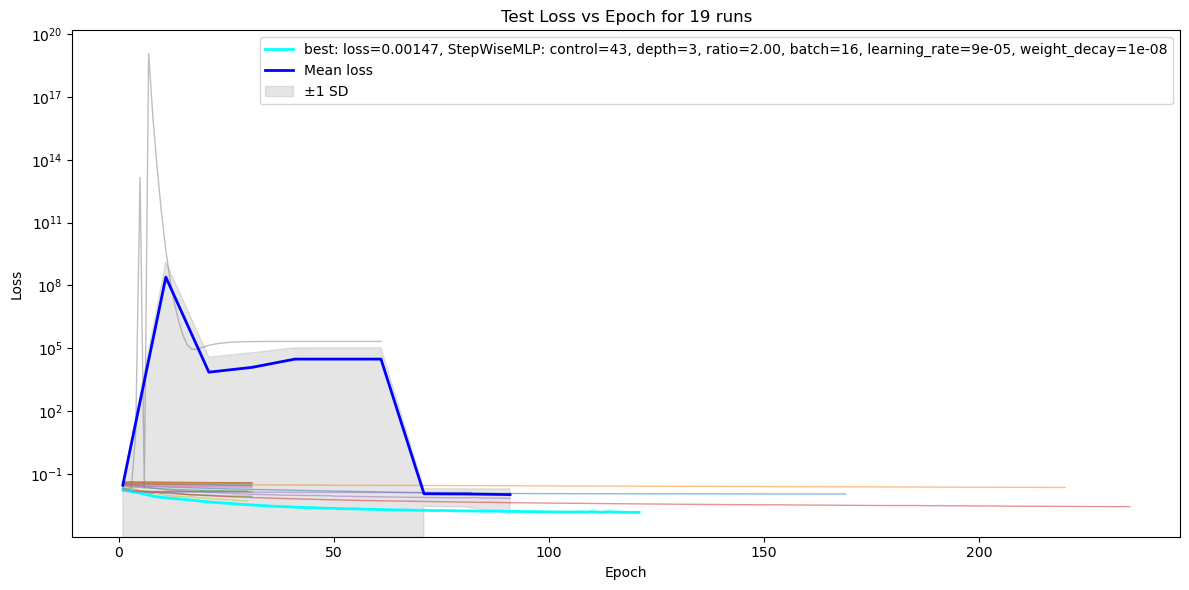




Hyper-Parameter tuning#23

train_model: hyper-parameters=[80, 0.007064209799779794, 1.159367719142745e-05, 44, 4, 0.4450765094328241]
opt_params=[80, 0.007064209799779794, 1.159367719142745e-05], model_params=[44, 4, 0.4450765094328241]
optimiser: batch=80, learning_rate=0.007, weight_decay=1e-05
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 23.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=819, bias=True)
    (1): ReLU()
    (2): Linear(in_features=819, out_features=375, bias=True)
    (3): ReLU()
    (4): Linear(in_features=375, out_features=44, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1069, out_features=1041, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1041, out_features=1031, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1031, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=5,247,934 parameters, exact=5,247,934, error=0.00%
model: StepWiseMLP: control=44, depth=4, ratio=0.45
train=80 samples, batch=80 --> 1.0 batches/epoch
Aborting: model returns NaNs :(



Hyper-Parameter tuning#24

train_model: hyper-parameters=[73, 0.0006836139322964381, 4.315722352014462e-08, 48, 4, 0.1]
opt_params=[73, 0.0006836139322964381, 4.315722352014462e-08], model_params=[48, 4, 0.1]
optimiser: batch=73, learning_rate=0.0007, weight_decay=4e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 21.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=127, bias=True)
    (3): ReLU()
    (4): Linear(in_features=127, out_features=48, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1073, out_features=1029, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1029, out_features=1025, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1025, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=3,775,103 parameters, exact=3,775,103, error=0.00%
model: StepWiseMLP: control=48, depth=4, ratio=0.10
train=80 samples, batch=73 --> 1.1 batches/epoch
total=2 sec, epoch=1 (1.7 sec/epoch), train=0.0799 (0.00%), test=0.0280 (0.00%), overfit=0.35
total=7 sec, epoch=6 (1.2 sec/epoch), train=0.0531 (-8.28%), test=0.0191 (-6.40%), overfit=0.36
total=13 sec, epoch=12 (1.1 sec/epoch), train=0.0661 (3.70%), test=0.0241 (3.19%), overfit=0.36
total=19 sec, epoch=18 (1.0 sec/epoch), train=0.0482 (-4.74%), test=0.0184 (-4.41%), overfit=0.38
total=24 sec, epoch=24 (1.0 sec/epoch), train=0.0486 (-7.66%), test=0.0187 (-5.96%), overfit=0.38
total=30 sec, epoch=30 (1.0 sec/epoch), train=0.0363 (-1.64%), test=0.0154 (-0.40%), overfit=0.42
Training is stalled...


Finished Training after 31 epochs in 30.9 sec (1.00 sec/epoch), sample duration=2.0 sec, test loss=0.02, train loss=0.04, overfit=0.4


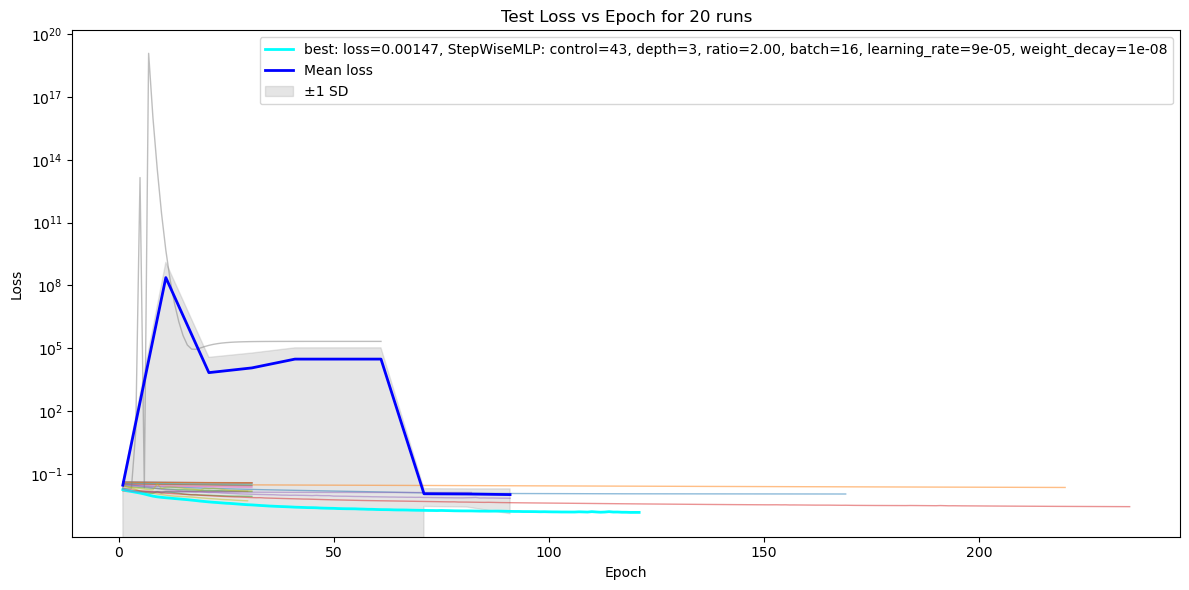




Hyper-Parameter tuning#25

train_model: hyper-parameters=[16, 0.00013668090357048072, 2.3796763071582427e-06, 48, 2, 1.2984664977480331]
opt_params=[16, 0.00013668090357048072, 2.3796763071582427e-06], model_params=[48, 2, 1.2984664977480331]
optimiser: batch=16, learning_rate=0.0001, weight_decay=2e-06
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 21.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=48, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1073, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,198,176 parameters, exact=1,198,176, error=0.00%
model: StepWiseMLP: control=48, depth=2, ratio=1.30
train=80 samples, batch=16 --> 5.0 batches/epoch
total=4 sec, epoch=3 (1.4 sec/epoch), train=0.0175 (-7.88%), test=0.0177 (-7.98%), overfit=1.01
total=9 sec, epoch=7 (1.3 sec/epoch), train=0.0133 (-6.18%), test=0.0134 (-6.69%), overfit=1.00
total=15 sec, epoch=12 (1.3 sec/epoch), train=0.0101 (-4.78%), test=0.0100 (-5.06%), overfit=0.99
total=22 sec, epoch=17 (1.3 sec/epoch), train=0.0082 (-3.78%), test=0.0080 (-3.88%), overfit=0.98
total=28 sec, epoch=22 (1.3 sec/epoch), train=0.0069 (-3.16%), test=0.0067 (-3.21%), overfit=0.98
total=34 sec, epoch=27 (1.3 sec/epoch), train=0.0060 (-2.57%), test=0.0058 (-2.49%), overfit=0.98
total=40 sec, epoch=32 (1.3 sec/epoch), train=0.0053 (-2.16%), test=0.0052 (-2.27%), overfit=0.98
total=46 sec, epoch=37 (1.2 sec/epoch), train=0.0048 (-2.11%), test=0.0048 (-2.19%), overfit=0.98
total=51 sec, epoch=41 (1.3 sec/epoch

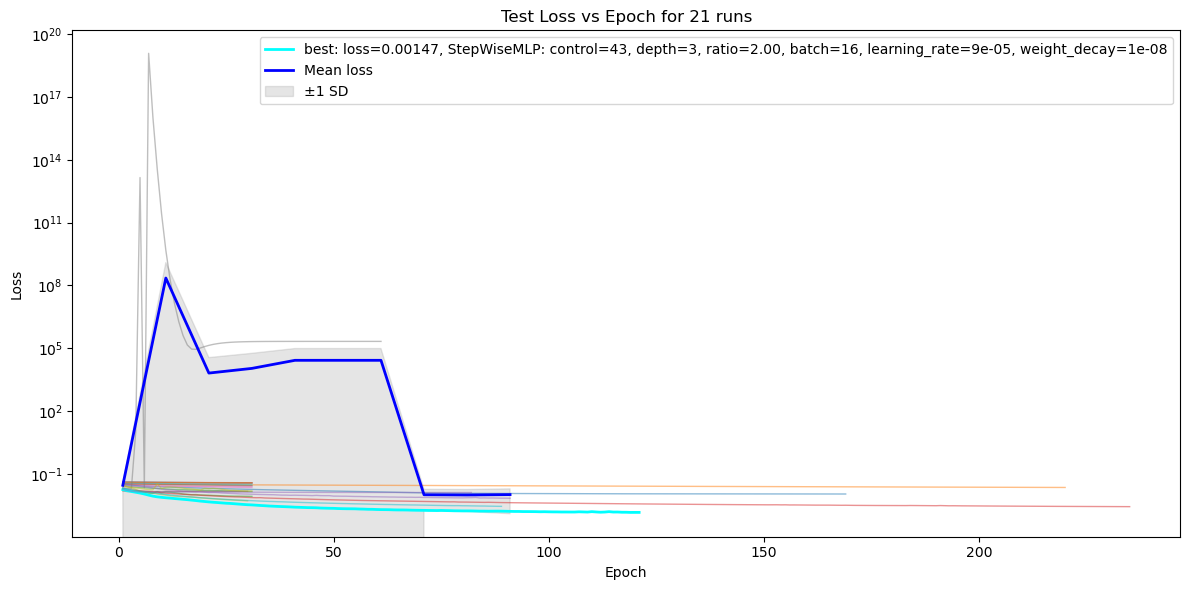




Hyper-Parameter tuning#26

train_model: hyper-parameters=[74, 0.000659884509558098, 7.076903652379857e-08, 41, 3, 0.11949224291705615]
opt_params=[74, 0.000659884509558098, 7.076903652379857e-08], model_params=[41, 3, 0.11949224291705615]
optimiser: batch=74, learning_rate=0.0007, weight_decay=7e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 25.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=41, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1066, out_features=1027, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1027, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=2,566,722 parameters, exact=2,566,722, error=0.00%
model: StepWiseMLP: control=41, depth=3, ratio=0.12
train=80 samples, batch=74 --> 1.1 batches/epoch
total=4 sec, epoch=4 (1.0 sec/epoch), train=0.0612 (-8.66%), test=0.0182 (-5.90%), overfit=0.30
total=9 sec, epoch=11 (0.9 sec/epoch), train=0.0461 (5.35%), test=0.0147 (3.33%), overfit=0.32
total=15 sec, epoch=18 (0.8 sec/epoch), train=0.0343 (-2.47%), test=0.0117 (-1.89%), overfit=0.34
total=20 sec, epoch=25 (0.8 sec/epoch), train=0.0274 (-3.85%), test=0.0090 (-4.80%), overfit=0.33
Training is stalled...


Finished Training after 31 epochs in 24.1 sec (0.78 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.02, overfit=0.3


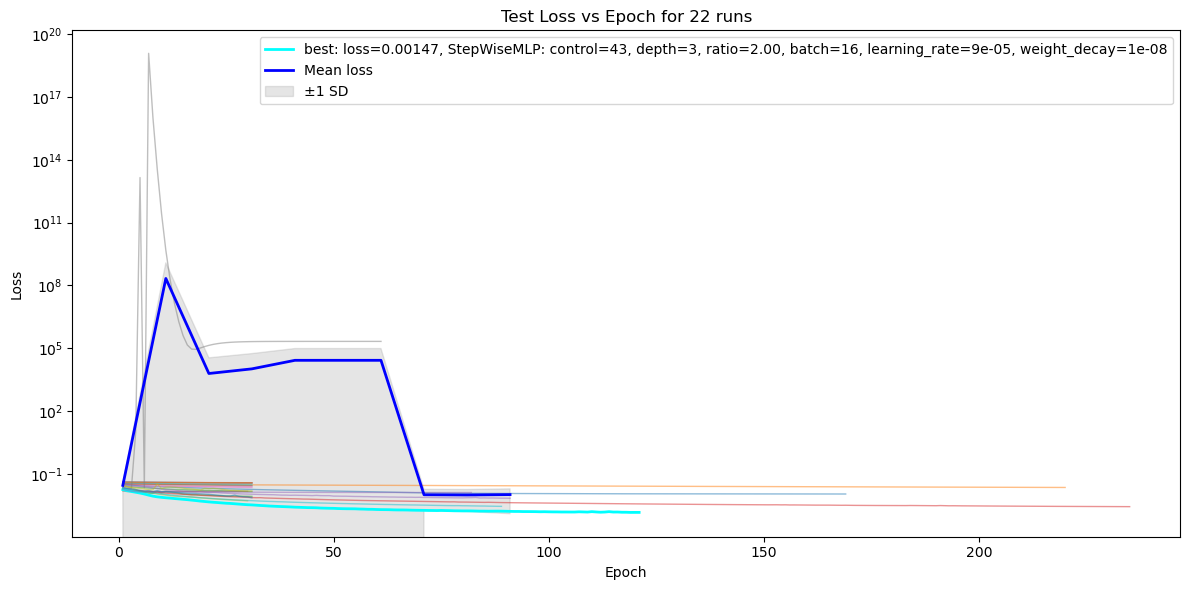




Hyper-Parameter tuning#27

train_model: hyper-parameters=[216, 3.887542034697859e-05, 2.171138573459135e-07, 20, 3, 1.504194092588765]
opt_params=[216, 3.887542034697859e-05, 2.171138573459135e-07], model_params=[20, 3, 1.504194092588765]
optimiser: batch=216, learning_rate=4e-05, weight_decay=2e-07
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 51.2 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1333, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1333, out_features=20, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1045, out_features=1037, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1037, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=4,906,944 parameters, exact=4,906,944, error=0.00%
model: StepWiseMLP: control=20, depth=3, ratio=1.50
train=80 samples, batch=216 --> 0.4 batches/epoch
total=1 sec, epoch=1 (0.9 sec/epoch), train=0.1291 (0.00%), test=0.0301 (0.00%), overfit=0.23
total=6 sec, epoch=11 (0.5 sec/epoch), train=0.1130 (-1.09%), test=0.0261 (-1.17%), overfit=0.23
total=11 sec, epoch=22 (0.5 sec/epoch), train=0.1016 (-0.90%), test=0.0233 (-0.94%), overfit=0.23
Training is stalled...


Finished Training after 31 epochs in 15.6 sec (0.50 sec/epoch), sample duration=2.0 sec, test loss=0.02, train loss=0.09, overfit=0.2


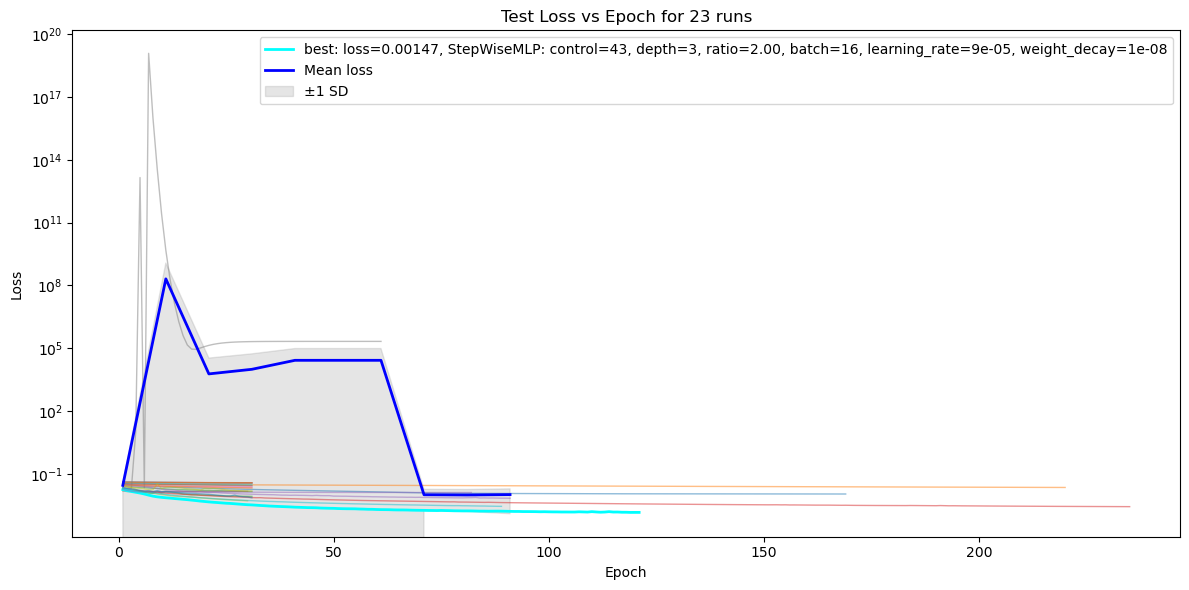




Hyper-Parameter tuning#28

train_model: hyper-parameters=[216, 5.064091430006963e-05, 2.8276086532317376e-07, 16, 3, 1.021056722308984]
opt_params=[216, 5.064091430006963e-05, 2.8276086532317376e-07], model_params=[16, 3, 1.021056722308984]
optimiser: batch=216, learning_rate=5e-05, weight_decay=3e-07
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 64.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1047, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1047, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1041, out_features=1032, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1032, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=4,296,254 parameters, exact=4,296,254, error=0.00%
model: StepWiseMLP: control=16, depth=3, ratio=1.02
train=80 samples, batch=216 --> 0.4 batches/epoch
total=1 sec, epoch=1 (0.8 sec/epoch), train=0.1241 (0.00%), test=0.0340 (0.00%), overfit=0.27
total=6 sec, epoch=12 (0.5 sec/epoch), train=0.1045 (-1.31%), test=0.0290 (-1.23%), overfit=0.28
total=12 sec, epoch=24 (0.5 sec/epoch), train=0.0909 (-1.05%), test=0.0254 (-1.02%), overfit=0.28
Training is stalled...


Finished Training after 31 epochs in 14.8 sec (0.48 sec/epoch), sample duration=2.0 sec, test loss=0.02, train loss=0.08, overfit=0.3


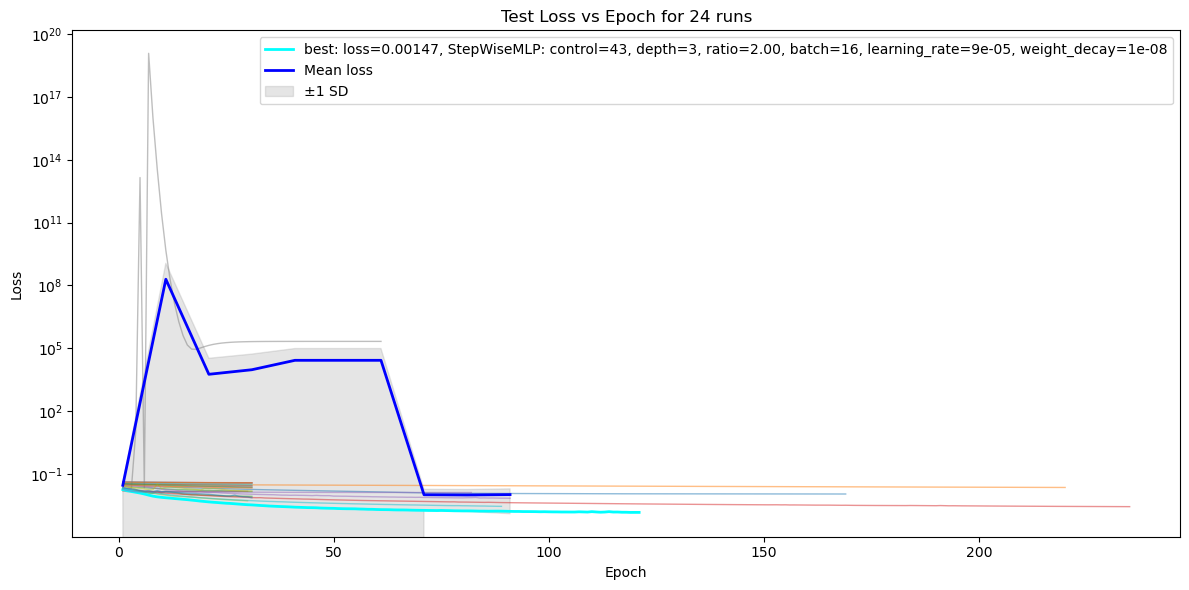




Hyper-Parameter tuning#29

train_model: hyper-parameters=[140, 0.007036014161894408, 1.572535462949302e-08, 10, 3, 0.14712052307754314]
opt_params=[140, 0.007036014161894408, 1.572535462949302e-08], model_params=[10, 3, 0.14712052307754314]
optimiser: batch=140, learning_rate=0.007, weight_decay=2e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 102.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=207, bias=True)
    (1): ReLU()
    (2): Linear(in_features=207, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1035, out_features=1025, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1025, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=2,538,954 parameters, exact=2,538,954, error=0.00%
model: StepWiseMLP: control=10, depth=3, ratio=0.15
train=80 samples, batch=140 --> 0.6 batches/epoch
Aborting: model returns NaNs :(



Hyper-Parameter tuning#30

train_model: hyper-parameters=[75, 0.0006404214262011258, 8.546442900491847e-07, 39, 4, 0.15747721337148618]
opt_params=[75, 0.0006404214262011258, 8.546442900491847e-07], model_params=[39, 4, 0.15747721337148618]
optimiser: batch=75, learning_rate=0.0006, weight_decay=9e-07
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 26.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=358, bias=True)
    (1): ReLU()
    (2): Linear(in_features=358, out_features=163, bias=True)
    (3): ReLU()
    (4): Linear(in_features=163, out_features=39, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1064, out_features=1030, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1030, out_features=1026, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1026, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=4,005,217 parameters, exact=4,005,217, error=0.00%
model: StepWiseMLP: control=39, depth=4, ratio=0.16
train=80 samples, batch=75 --> 1.1 batches/epoch
total=2 sec, epoch=1 (1.7 sec/epoch), train=0.0908 (0.00%), test=0.0209 (0.00%), overfit=0.23
total=7 sec, epoch=6 (1.2 sec/epoch), train=0.0598 (-8.35%), test=0.0159 (-2.98%), overfit=0.27
total=13 sec, epoch=12 (1.1 sec/epoch), train=0.0671 (0.07%), test=0.0167 (-0.33%), overfit=0.25
total=19 sec, epoch=18 (1.0 sec/epoch), train=0.0452 (0.58%), test=0.0120 (-1.75%), overfit=0.27
total=24 sec, epoch=24 (1.0 sec/epoch), train=0.0415 (-10.59%), test=0.0114 (-12.19%), overfit=0.28
total=30 sec, epoch=30 (1.0 sec/epoch), train=0.0385 (-0.79%), test=0.0107 (-0.23%), overfit=0.28
Training is stalled...


Finished Training after 31 epochs in 31.1 sec (1.00 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.04, overfit=0.3


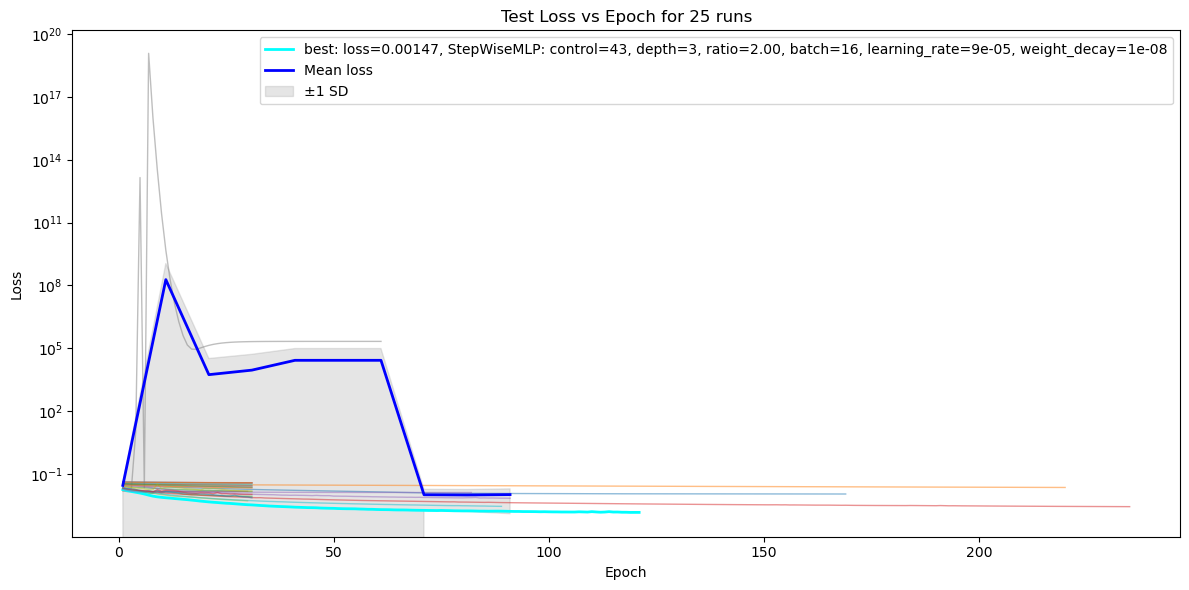




Hyper-Parameter tuning#31

train_model: hyper-parameters=[74, 0.0006558670515074003, 7.439861798640932e-08, 40, 4, 0.20023483871244013]
opt_params=[74, 0.0006558670515074003, 7.439861798640932e-08], model_params=[40, 4, 0.20023483871244013]
optimiser: batch=74, learning_rate=0.0007, weight_decay=7e-08
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 25.6 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=436, bias=True)
    (1): ReLU()
    (2): Linear(in_features=436, out_features=196, bias=True)
    (3): ReLU()
    (4): Linear(in_features=196, out_features=40, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1065, out_features=1032, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1032, out_features=1027, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1027, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=4,201,007 parameters, exact=4,201,007, error=0.00%
model: StepWiseMLP: control=40, depth=4, ratio=0.20
train=80 samples, batch=74 --> 1.1 batches/epoch
total=4 sec, epoch=3 (1.3 sec/epoch), train=0.0630 (-7.97%), test=0.0278 (-7.90%), overfit=0.44
total=10 sec, epoch=9 (1.1 sec/epoch), train=0.0475 (-5.00%), test=0.0205 (-5.31%), overfit=0.43
total=16 sec, epoch=15 (1.0 sec/epoch), train=0.0359 (-3.28%), test=0.0158 (-3.15%), overfit=0.44
total=21 sec, epoch=21 (1.0 sec/epoch), train=0.0331 (-1.34%), test=0.0148 (-1.27%), overfit=0.45
total=27 sec, epoch=27 (1.0 sec/epoch), train=0.0320 (-0.78%), test=0.0146 (-0.55%), overfit=0.46
Training is stalled...


Finished Training after 31 epochs in 31.3 sec (1.01 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.03, overfit=0.5


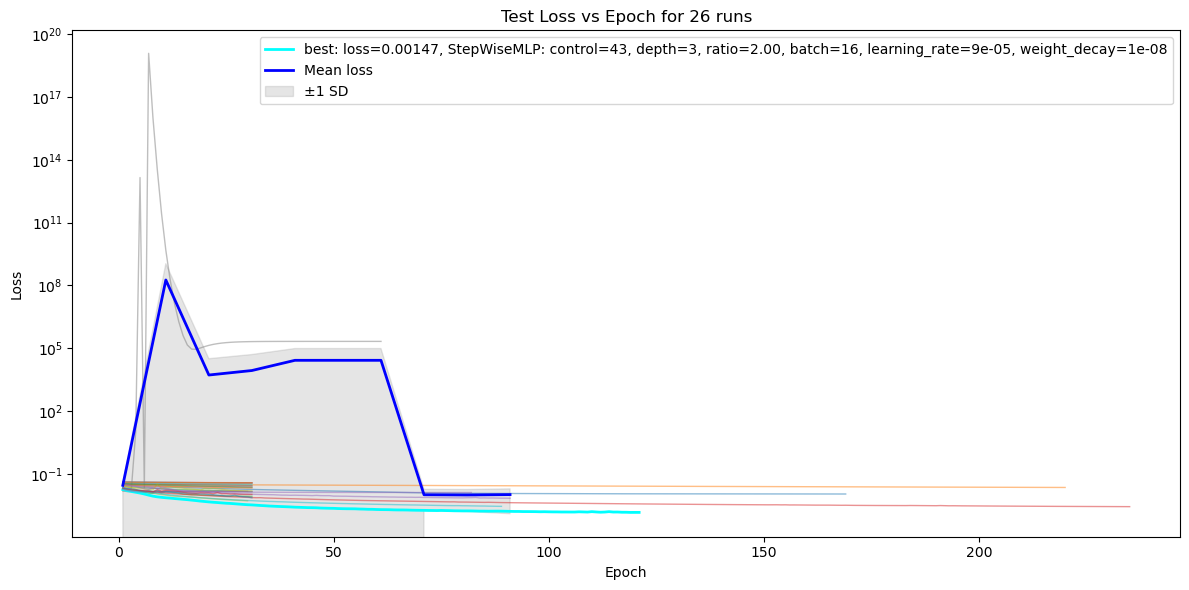




Hyper-Parameter tuning#32

train_model: hyper-parameters=[27, 0.0013130178446050008, 0.00016549976781148239, 17, 2, 0.1112781141051031]
opt_params=[27, 0.0013130178446050008, 0.00016549976781148239], model_params=[17, 2, 0.1112781141051031]
optimiser: batch=27, learning_rate=0.001, weight_decay=0.0002
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 60.2 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=17, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1042, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,102,882 parameters, exact=1,102,882, error=0.00%
model: StepWiseMLP: control=17, depth=2, ratio=0.11
train=80 samples, batch=27 --> 3.0 batches/epoch
total=1 sec, epoch=1 (0.9 sec/epoch), train=32.8856 (0.00%), test=24.4649 (0.00%), overfit=0.74
total=7 sec, epoch=8 (0.8 sec/epoch), train=25092933306716390424576.0000 (503808932037205512159232.00%), test=16421688116363432820736.0000 (726256148862660279009280.00%), overfit=0.65
total=12 sec, epoch=15 (0.8 sec/epoch), train=23671652855626162241536.0000 (-0.68%), test=15143301955637578039296.0000 (-0.95%), overfit=0.64
total=17 sec, epoch=22 (0.8 sec/epoch), train=22615028387856661872640.0000 (-0.62%), test=14203263353616720723968.0000 (-0.87%), overfit=0.63
total=22 sec, epoch=29 (0.8 sec/epoch), train=21733591187137102872576.0000 (-0.54%), test=13432884356758164733952.0000 (-0.75%), overfit=0.62
total=28 sec, epoch=36 (0.8 sec/epoch), train=20983956473849657163776.0000 (-0.47%), test=127862473891611473346

total=297 sec, epoch=400 (0.7 sec/epoch), train=12185601377991321976832.0000 (-0.08%), test=9626402545207882022912.0000 (0.02%), overfit=0.79
Total time=300.3 exceeds max=300sec


Finished Training after 405 epochs in 300.3 sec (0.74 sec/epoch), sample duration=2.0 sec, test loss=9641719287540569079808.00, train loss=12137896703389673193472.00, overfit=0.8


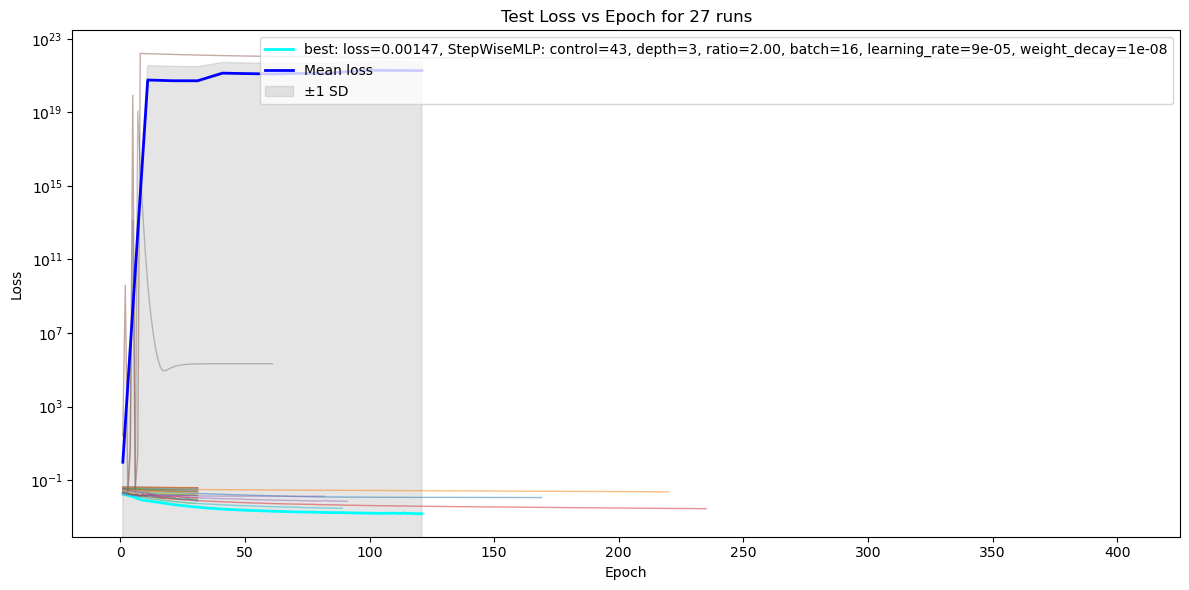




Hyper-Parameter tuning#33

train_model: hyper-parameters=[27, 0.00131170682055502, 3.534674853054477e-05, 18, 2, 0.1212916762972459]
opt_params=[27, 0.00131170682055502, 3.534674853054477e-05], model_params=[18, 2, 0.1212916762972459]
optimiser: batch=27, learning_rate=0.001, weight_decay=4e-05
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 56.9 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=18, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1043, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,105,956 parameters, exact=1,105,956, error=0.00%
model: StepWiseMLP: control=18, depth=2, ratio=0.12
train=80 samples, batch=27 --> 3.0 batches/epoch
total=1 sec, epoch=1 (1.2 sec/epoch), train=0.0314 (0.00%), test=0.0182 (0.00%), overfit=0.58
total=7 sec, epoch=8 (0.9 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=12 sec, epoch=15 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=17 sec, epoch=22 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=22 sec, epoch=29 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan


/Users/Richard/Coding/SampleGen/ModelUtils.py:74: RuntimeWarning: invalid value encountered in scalar divide
  change = new / old - 1
/Users/Richard/Coding/SampleGen/ModelUtils.py:103: RuntimeWarning: invalid value encountered in scalar divide
  overfit = test_loss / train_loss
/Users/Richard/Coding/SampleGen/ModelUtils.py:111: RuntimeWarning: invalid value encountered in scalar divide
  return  test_loss / train_loss > max_overfit


total=28 sec, epoch=36 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=33 sec, epoch=43 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=39 sec, epoch=50 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=44 sec, epoch=57 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=49 sec, epoch=64 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=54 sec, epoch=71 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=59 sec, epoch=78 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=65 sec, epoch=85 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=70 sec, epoch=92 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=75 sec, epoch=99 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=81 sec, epoch=106 (0.8 sec/epoch), train=inf (nan%), test=inf (nan%), overfit=nan
total=86 sec, epoch=113 (0.8 sec/epoch), t

/Users/Richard/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


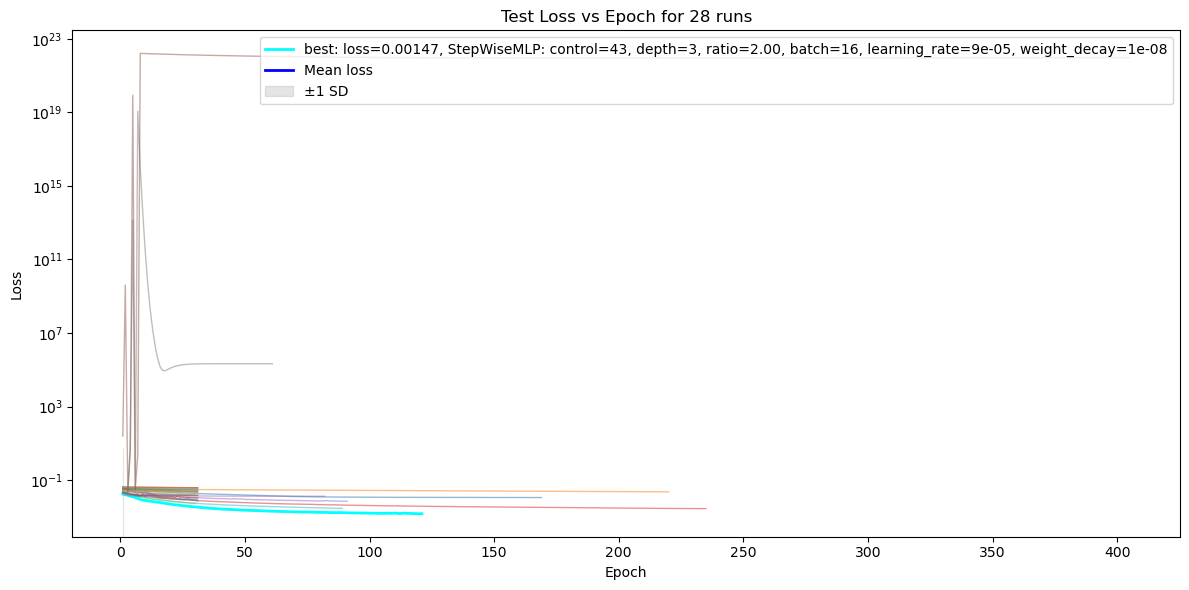




Hyper-Parameter tuning#34

train_model: hyper-parameters=[38, 0.00038345831395489364, 4.993346785162294e-05, 16, 2, 0.41485243583497733]
opt_params=[38, 0.00038345831395489364, 4.993346785162294e-05], model_params=[16, 2, 0.41485243583497733]
optimiser: batch=38, learning_rate=0.0004, weight_decay=5e-05
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 64.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1041, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,099,808 parameters, exact=1,099,808, error=0.00%
model: StepWiseMLP: control=16, depth=2, ratio=0.41
train=80 samples, batch=38 --> 2.1 batches/epoch
total=2 sec, epoch=2 (0.8 sec/epoch), train=0.0445 (-10.27%), test=0.0171 (-11.94%), overfit=0.38
total=7 sec, epoch=9 (0.8 sec/epoch), train=0.0275 (-5.76%), test=0.0109 (-4.95%), overfit=0.40
total=12 sec, epoch=16 (0.8 sec/epoch), train=0.0203 (-3.65%), test=0.0083 (-2.87%), overfit=0.41
total=17 sec, epoch=23 (0.8 sec/epoch), train=0.0160 (-2.98%), test=0.0068 (-3.29%), overfit=0.43
total=23 sec, epoch=30 (0.8 sec/epoch), train=0.0137 (-3.95%), test=0.0059 (-3.96%), overfit=0.43
Training is stalled...


Finished Training after 31 epochs in 23.4 sec (0.75 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.01, overfit=0.4


/Users/Richard/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


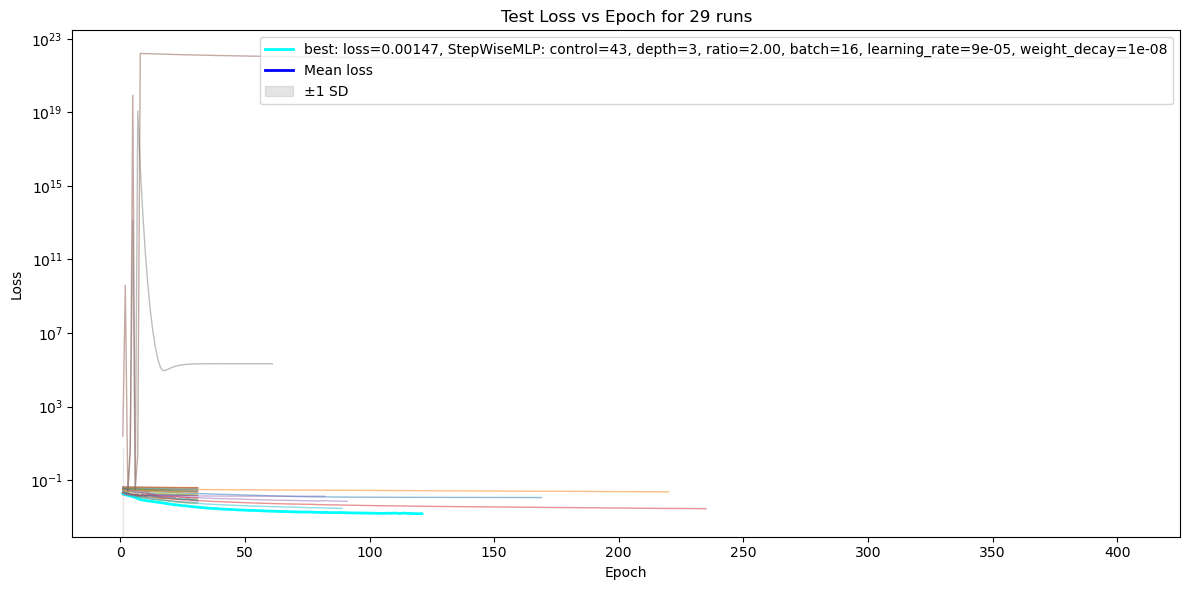




Hyper-Parameter tuning#35

train_model: hyper-parameters=[38, 0.00038302955047418377, 5.641759561531336e-05, 16, 2, 0.438725224179014]
opt_params=[38, 0.00038302955047418377, 5.641759561531336e-05], model_params=[16, 2, 0.438725224179014]
optimiser: batch=38, learning_rate=0.0004, weight_decay=6e-05
encode={encode_layer_sizes}={encode_size:,}, decode={decode_layer_sizes}={decode_size:,}, total={total:,}
Compression: 64.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1041, out_features=1024, bias=True)
  )
)

model=StepWiseMLP, approx size=1,099,808 parameters, exact=1,099,808, error=0.00%
model: StepWiseMLP: control=16, depth=2, ratio=0.44
train=80 samples, batch=38 --> 2.1 batches/epoch
total=4 sec, epoch=5 (0.8 sec/epoch), train=0.0352 (-6.72%), test=0.0166 (-6.72%), overfit=0.47
total=9 sec, epoch=12 (0.8 sec/epoch), train=0.0241 (-4.51%), test=0.0117 (-3.97%), overfit=0.48
total=14 sec, epoch=19 (0.8 sec/epoch), train=0.0182 (-3.39%), test=0.0091 (-3.00%), overfit=0.50
total=20 sec, epoch=26 (0.8 sec/epoch), train=0.0153 (-0.46%), test=0.0079 (-0.30%), overfit=0.51
total=25 sec, epoch=33 (0.8 sec/epoch), train=0.0129 (-2.05%), test=0.0068 (-1.63%), overfit=0.52
total=30 sec, epoch=40 (0.7 sec/epoch), train=0.0112 (-1.66%), test=0.0060 (-1.30%), overfit=0.53
total=35 sec, epoch=47 (0.7 sec/epoch), train=0.0101 (-1.46%), test=0.0055 (-1.13%), overfit=0.54


/Users/Richard/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


total=40 sec, epoch=54 (0.7 sec/epoch), train=0.0095 (-0.93%), test=0.0052 (-1.52%), overfit=0.55
total=45 sec, epoch=61 (0.7 sec/epoch), train=0.0087 (-1.13%), test=0.0049 (-0.50%), overfit=0.56
total=50 sec, epoch=68 (0.7 sec/epoch), train=0.0081 (-1.04%), test=0.0046 (-0.81%), overfit=0.56
total=56 sec, epoch=75 (0.7 sec/epoch), train=0.0079 (-4.60%), test=0.0044 (-5.62%), overfit=0.56
total=61 sec, epoch=82 (0.7 sec/epoch), train=0.0073 (-0.94%), test=0.0042 (-0.39%), overfit=0.58
total=66 sec, epoch=89 (0.7 sec/epoch), train=0.0069 (-0.51%), test=0.0040 (-0.20%), overfit=0.58
total=71 sec, epoch=96 (0.7 sec/epoch), train=0.0066 (-0.16%), test=0.0039 (0.34%), overfit=0.58
total=76 sec, epoch=103 (0.7 sec/epoch), train=0.0063 (-0.74%), test=0.0037 (-0.64%), overfit=0.59
total=82 sec, epoch=110 (0.7 sec/epoch), train=0.0060 (-0.67%), test=0.0035 (-0.35%), overfit=0.59
total=87 sec, epoch=117 (0.7 sec/epoch), train=0.0059 (1.59%), test=0.0035 (1.22%), overfit=0.59
total=92 sec, epoch=

In [ ]:
from HyperParameterTuning import *

optimise_hyper_parameters()
#train_best_params()

In [ ]:
# Test every sample and measure the error.
#test_all()


In [ ]:
# Generate some new samples, either by interpolation or randome perturbation
from Generate import *

#generate_morphs()

#generate_variations()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

# Generate samples from each variable
#generate_main_encodings()